# Lending Club Case Study

## Business Understanding 
Lending Club is a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The given data contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

   - Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

   - Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

   - Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

## 1. Data Understanding

In this section we would try to understand the data available to us in form of csv file and try to find out if if there is any data quality issue.


### 1.1 Understanding the Columns

##### Loan Information:

- `id`, `member_id`: Unique identifiers for the loan and borrower.
- `loan_amnt`: The total amount of money borrowed.
- `funded_amnt`: Amount approved for funding by the lender.
- `funded_amnt_inv`: Investor-contributed amount for the loan.
- `term`: Loan term in months (e.g., 36 or 60 months).
- `int_rate`: Interest rate charged on the loan.
- `installment`: Monthly installment payment amount.

##### Borrower Details:

- `emp_title`: The borrower’s job title.
- `emp_length`: Years of employment (e.g., "10+ years", "<1 year").
- `home_ownership`: Type of homeownership (e.g., OWN, MORTGAGE, RENT).
- `annual_inc`: Borrower’s self-reported annual income.
- `addr_state`: Borrower’s state of residence.

##### Credit and Payment History:

- `revol_util`: Revolving credit utilization percentage (percentage of available credit used).
- `earliest_cr_line`: Date of the borrower’s earliest credit line.
- `open_acc`: Number of open credit accounts.
- `total_acc`: Total number of credit accounts.
- `pub_rec`: Number of derogatory public records (e.g., bankruptcies).

##### Loan Status:

- `loan_status`: Status of the loan (e.g., Fully Paid, Charged Off, Current).
- `pymnt_plan`: Indicates if the borrower is on a payment plan.

##### Purpose and Description:

- `purpose`: The purpose of the loan (e.g., debt consolidation, home improvement).
- `title`: Free-text field for the loan purpose.
- `desc`: Description of the loan provided by the borrower.

##### Repayment Details:

- `last_pymnt_d`, `last_pymnt_amnt`: Date and amount of the last payment.
- `next_pymnt_d`: Expected date of the next payment (if applicable).
- `total_rec_prncp`, `total_rec_int`: Total principal and interest received to date.


##### Derived Metrics:

- `dti`: Debt-to-income ratio (borrower’s monthly debt payments as a percentage of income).
- `fico_range_low`, `fico_range_high`: Borrower’s FICO credit score range.

##### Lender and Investor Details:

- `initial_list_status`: Initial listing status of the loan.
- `out_prncp`: Remaining outstanding principal.
- `total_pymnt`: Total amount paid by the borrower to date.

##### Primary Column
`loan_status` is our primary column. It Can have 3 values:
- Fully-Paid: Signifies customers who have successfully repaid their loans.
- Charged-Off: Indicates customers who have been labeled as "Charged-Off" or have defaulted on their loans.
- Current: Represents customers whose loans are presently in progress and, thus, cannot provide conclusive evidence regarding future defaults.
    - For the purposes of this case study, rows with a "Current" status will be excluded from the analysis.

In [354]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import random

In [355]:
# Read the csv file using pandas
df = pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [356]:
# Get the shape of the data
df.shape

(39717, 111)

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [358]:
# Columns with Missing data
null_col_counts = df.isnull().sum()
null_col_counts

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [359]:
# Count of columns with Missing data
null_col_counts[null_col_counts>0].count()

np.int64(68)

In [360]:
# Count of columns with no data i.e. only blank data
null_col_counts[null_col_counts==len(df)].count()

np.int64(54)

In [361]:
# summing up the missing values (column-wise) and finding percentage of missing values
round(100*(df.isnull().sum()/len(df)), 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [362]:
# Finding the count of columns that have more than 60% missing values
len(df.columns[round(100*(df.isnull().sum()/len(df.id)), 2)>=60])

57

In [363]:
# Columns with single unique values or Unique and null values
df.columns[df.nunique()==1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [364]:
# Number of Columns with single unique values or Unique and null values
len(df.columns[df.nunique()==1])

9

In [365]:
# Find Number of duplicate rows if any
df.duplicated().sum()

np.int64(0)

### 1.2 Row Analysis

- **Duplicate Rows:** No Duplicate rows in the dataset.
- **Extra Rows and Header Footer Rows:** Not present
- **Rows with "Current" status:** Rows with a "loan_status" of "Current" will be dropped as they represent loans in progress and do not contribute to loan approval decisions. This step also helps clean up unnecessary columns related to "Current" loans and handle columns with NA values efficiently.



### 1.3 Dataset Column Analysis
The dataset has 3977 rows and 111 columns. Out of the 111 columns, 68 columns had missing values.

##### Columns that can be removed
- 54 columns are blank and a total of 57 columns have more than 60% null values. We can delete these 57 columns.
- 9 columns with single unique values or Unique and null values. They can also be deleted.
- `id`, `member_id`: Unique identifiers for the loan and borrower that do not contribute to the analysis. 
- `earliest_cr_line`: Date of the borrower’s earliest credit line. 
- `url`	: URL for the LC page with listing data. This will not be required for analysis.
- `desc` : Loan description provided by the borrower. Requires extensive preprocessing (e.g., NLP) to extract insights.
- `title` : The loan title provided by the borrower. Free-text field for the loan purpose. Similar to desc and often redundant with purpose.
- `delinq_2yrs`: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. Two years is a long time frame to analyse
- `total_rec_prncp`, `total_rec_int`, `total_rec_late_fee`, `recoveries`, `collection_recovery_fee`: Columns summarizing repayment amounts or statuses after default should not be predictors
- `funded_amnt` value is same as loan_amnt. So it can be removed.
- `total_pymnt`, `total_pymnt_inv`, `total_rec_int`, `total_rec_late_fee`, `total_rec_prncp`: They represent outcome data rather than features influencing charge-offs. Would not be useful to predict charge-offs.
- `revol_bal` - Not required for analysis
- `emp_title` provides information about the borrower's profession but is unstructured text in job titles may not consistently correlate with risk.
- `last_credit_pull_d`, `last_pymnt_amnt` - this column can be removed as it is not predictive of borrower risk. 
- `last_pymnt_d` reflects repayment activity, it is not predictive of borrower risk
- `out_prncp` represents outstanding Principal Balance. This column can be removed.
- `out_prncp_inv` Outstanding Principal Balance for Investors. Reflects the current state of the loan and is an outcome variable. It can be removed.
- `recoveries` Reflects post-default loan recovery outcomes.
- `funded_amnt_inv` very closely related to funded_amnt. 
- `zip_code` Similar to addr_state. It has too many values to group data using it.

##### Converting Column format and data types
- Remove % from `int_rate` and convert it to float type.
- Remove % from `revol_util` and convert it to float type.
- Convert the column `issue_d` from string to DateTime.
- Change dtype of `emp_length` from Object to Category

##### Handling Missing Values
- `pub_rec_bankruptcies`: It has a skewed distribution, with most borrowers having 0 bankruptcies. In this case the mode imputation is particularly effective. The mode is 0.
- `revol_util`: It has no outliers, the mean is a good representation of the central tendency. The missing Values can be imputed with mean.
- `emp_length`: For the customers having no data in emp_length, we assume that they are not employed and are self employed. We use the mode to impute these missing values.

##### Derived Columns
- `issue_d` needs to be broken into month and date.
- `loan_amnt`, `int_rate`, `annual_inc`, `dti`, `revol_unit` needs to be broken down into buckets. So, one new bucketed category column needs to be created for each.

##### Outlier Handling
- The evaluation for outliers is performed on the following columns: `loan_amnt`, `int_rate`, `installment`, `annual_inc`, `dti`, `revol_util`.

## 2. Data Cleaning and Manipulation

### 2.1 Removing Columns with more than 60% missing values

Though some fo the columns could to be useful to determine the likely defualters, but imputing such a large anount data, more than 60% in this case, can potentially skew the analysis or give wrong inferences. So it is better to drop these columns. 

In [366]:
# summing up the missing values (column-wise) and finding percentage of missing values
round(100*(df.isnull().sum()/len(df)), 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [367]:
# Finding the list of columns that have more than 60% missing values
column_60_missing = df.columns[round(100*(df.isnull().sum()/len(df.id)), 2)>=60]

In [368]:
# Finding the count of columns that have more than 60% missing values
len(column_60_missing)

57

In [369]:
# Removing these 57 Columns from dataset
df = df.drop(column_60_missing, axis = 1)

In [370]:
df.shape

(39717, 54)

### 2.2 Removing Columns with Single Unique value

Column with single value is not useful in data analysis and can be removed.

In [371]:
# Columns with single unique values or Unique and null values
columns_single_values = df.columns[df.nunique()==1]

In [372]:
# Count of columns with single unique values
len(columns_single_values)

9

In [373]:
# Removing these 9 Columns from dataset
df = df.drop(columns_single_values, axis = 1)

In [374]:
df.shape

(39717, 45)

### 2.3 Removing other Columns Not required of this analysis

In [375]:
# List ot columns not required for analysis

columns_to_remove = ['id', 'member_id', 'url', 'desc', 'title', 'funded_amnt',
                     'delinq_2yrs', 'total_rec_prncp', 'total_rec_int', 
                     'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',  
                     'total_pymnt', 'total_pymnt_inv', 'emp_title', 'revol_bal',
                     'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 
                     'out_prncp','out_prncp_inv','funded_amnt_inv','zip_code', 'earliest_cr_line']

In [376]:
len(columns_to_remove)

24

In [377]:
# Deleting the Irrelevant columns
df = df.drop(columns_to_remove, axis = 1)

In [378]:
df.shape

(39717, 21)

### 2.4 Data Type Rectification

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_length            38642 non-null  object 
 7   home_ownership        39717 non-null  object 
 8   annual_inc            39717 non-null  float64
 9   verification_status   39717 non-null  object 
 10  issue_d               39717 non-null  object 
 11  loan_status           39717 non-null  object 
 12  purpose               39717 non-null  object 
 13  addr_state            39717 non-null  object 
 14  dti                   39717 non-null  float64
 15  inq_last_6mths     

##### Changing dtype of int_rate and revol_util from Object to Float

In [380]:
# remove % from int_rate and convert it to float type
df['int_rate'] = df['int_rate'].str.replace('%','')
df['int_rate'] = df['int_rate'].astype(float)

In [381]:
df['int_rate'].dtype

dtype('float64')

In [382]:
# remove % from revol_util and convert it to float type
df['revol_util'] = df['revol_util'].str.replace('%','')
df['revol_util'] = df['revol_util'].astype(float)

In [383]:
df['revol_util'].dtype

dtype('float64')

##### Changing dtype of issue_d from Object to DateTime

In [384]:
# Converting the column issue_d from string to DateTime
df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
df['issue_d'].dtype

dtype('<M8[ns]')

##### Changing dtype of emp_length from Object to Category

In [385]:
emp_length_categories = pd.CategoricalDtype(
    categories=['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
    '6 years', '7 years', '8 years', '9 years', '10+ years'],
    ordered=True)
df['emp_length']=df['emp_length'].astype(emp_length_categories)
df['emp_length'].dtype

CategoricalDtype(categories=['< 1 year', '1 year', '2 years', '3 years', '4 years',
                  '5 years', '6 years', '7 years', '8 years', '9 years',
                  '10+ years'],
, ordered=True, categories_dtype=object)

### 2.5 Drop Rows for loan_status 'Current'

We need to study the attributes of risky loan applicants. For that we need to study the customers who has either Defaulted or paid the loan Fully. Current customers don't provide us any insight to the analysis. So, we can Ignore them.

In [386]:
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [387]:
# Deleting all Rows with loan_status='Current'
df = df[df['loan_status']!='Current']

df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

### 2.6 Outlier Handling

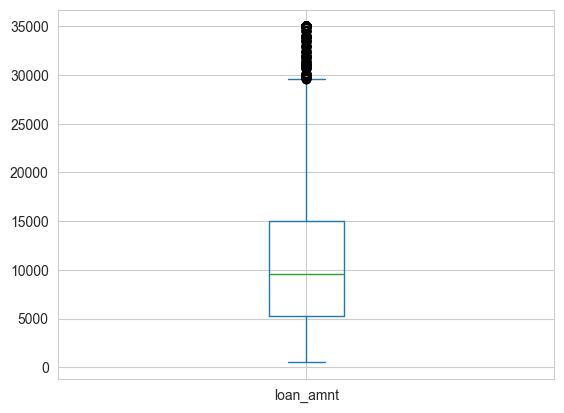

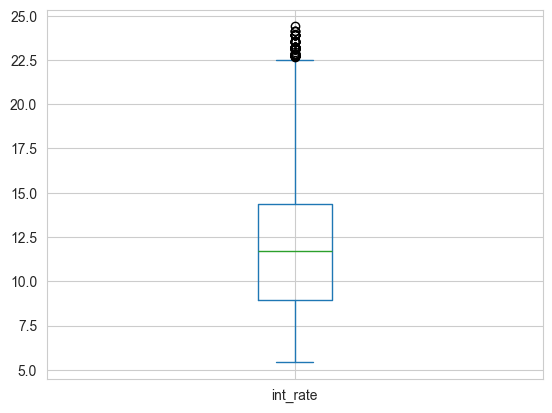

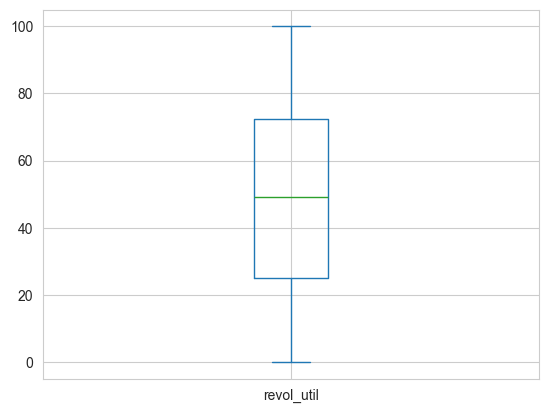

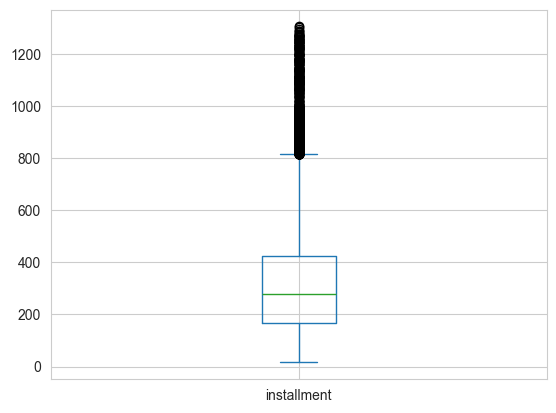

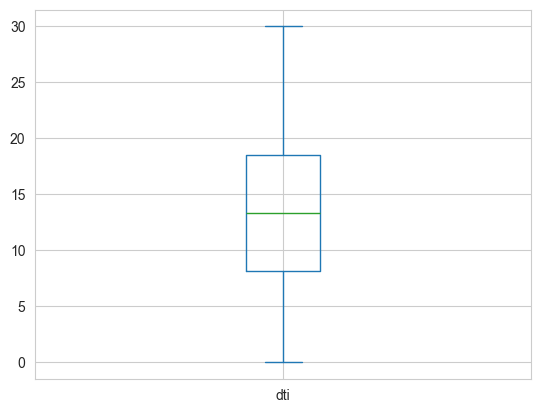

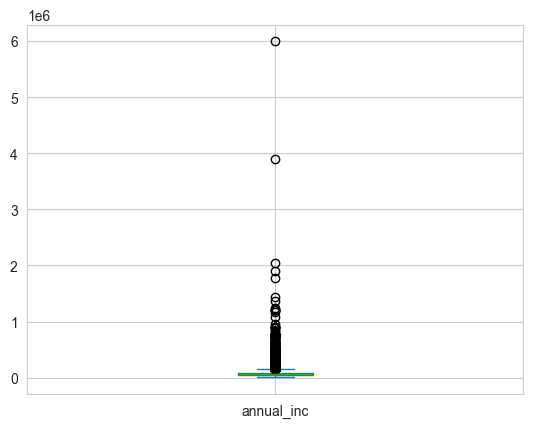

In [388]:
# draw boxplot for each column
sns.set_style("whitegrid")
for column in ['loan_amnt', 'int_rate','revol_util', 
            'installment', 'dti', 'annual_inc']:
    df[column].plot.box()
    plt.show()

<Axes: >

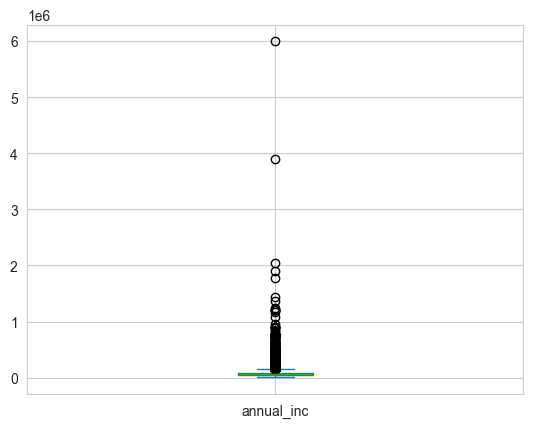

In [389]:
# Boxplot for annual_inc
df['annual_inc'].plot.box()

In [390]:
# Inspecting annual_inc for outliners
df['annual_inc'].value_counts().sort_index(ascending=False).head(20)

annual_inc
6000000.0    1
3900000.0    1
2039784.0    1
1900000.0    1
1782000.0    1
1440000.0    1
1362000.0    1
1250000.0    1
1200000.0    4
1176000.0    1
1080000.0    1
948000.0     1
900000.0     4
889000.0     1
840000.0     1
828000.0     1
800000.0     1
780000.0     5
762000.0     1
756000.0     1
Name: count, dtype: int64

In [391]:
# few customers have very high annual income which needs to be removed.
# Removing the top 5 percentile annual income customers
df = df[(df.annual_inc < np.percentile(df.annual_inc,95))]

<Axes: >

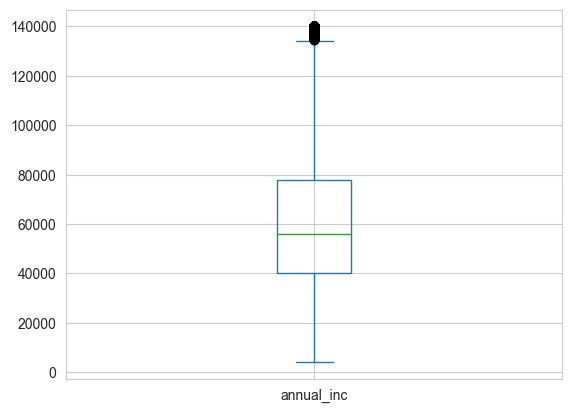

In [392]:
df['annual_inc'].plot.box()

### 2.7 Imputing Missing Values

In [393]:
# Missing Value count for each column
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1014
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                48
total_acc                  0
pub_rec_bankruptcies     658
dtype: int64

#### 2.7.1 Column 'pub_rec_bankruptcies'

In [394]:
# Missing value count for pub_rec_bankruptcies
df['pub_rec_bankruptcies'].isnull().sum()

np.int64(658)

In [395]:
# Missing value count for pub_rec_bankruptcie Precentage
round(100*(df['pub_rec_bankruptcies'].isnull().sum()/len(df)), 2)

np.float64(1.8)

In [396]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    34380
1.0     1599
2.0        5
Name: count, dtype: int64

##### The Column 'pub_rec_bankruptcies' has 658 missing values, which is just 1.8%. 
It has a skewed distribution, with most borrowers having 0 bankruptcies. In this case the mode imputation is particularly effective. The mode is 0. So, actually we are assuming that the customer will missing values actually has no bankruptcies.

In [397]:
# Finding the mode of pub_rec_bankruptcies
df['pub_rec_bankruptcies'].mode()

0    0.0
Name: pub_rec_bankruptcies, dtype: float64

In [398]:
# Filling the blank values of pub_rec_bankruptcies with mode i.e. 0
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].fillna(0)

In [399]:
# Missing value count for pub_rec_bankruptcies
df['pub_rec_bankruptcies'].isnull().sum()

np.int64(0)

#### 2.7.2 Column 'revol_util'

In [400]:
# Missing value count for revol_util
df['revol_util'].isnull().sum()

np.int64(48)

In [401]:
# Missing value count for revol_util Precentage
round(100*(df['revol_util'].isnull().sum()/len(df)), 2)

np.float64(0.13)

<Axes: >

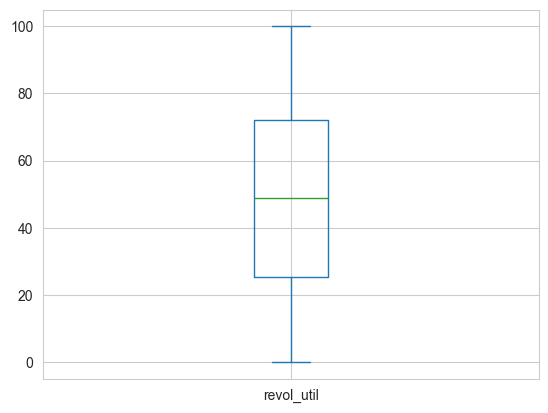

In [402]:
# Box plot for revol_util
df['revol_util'].plot.box()

In [403]:
# revol_util value distribution
df['revol_util'].describe()

count    36594.000000
mean        48.661597
std         28.281775
min          0.000000
25%         25.300000
50%         49.000000
75%         72.100000
max         99.900000
Name: revol_util, dtype: float64

##### The Column 'revol_util' has 48 missing values, which is just 0.13%.
It has no outliers, the mean is a good representation of the central tendency.

In [404]:
# Mean of revol_util
round(df['revol_util'].mean(),2)

np.float64(48.66)

In [405]:
# Filling the blank values of revol_util with mean
df['revol_util']=df['revol_util'].fillna(df['revol_util'].mean())

In [406]:
# Missing value count for revol_util
df['revol_util'].isnull().sum()

np.int64(0)

#### 2.7.3 Column 'emp_length'

In [407]:
# Missing value count for revol_util
df['emp_length'].isnull().sum()

np.int64(1014)

In [408]:
# Missing value count for revol_util Precentage
round(100*(df['emp_length'].isnull().sum()/len(df)), 2)

np.float64(2.77)

In [409]:
df['emp_length'].value_counts()

emp_length
10+ years    7884
< 1 year     4327
2 years      4101
3 years      3823
4 years      3197
5 years      3044
1 year       3043
6 years      2073
7 years      1643
8 years      1341
9 years      1152
Name: count, dtype: int64

##### The column 'emp_length' has 1014 missing value which is 2.77%. 
Since these customers has no data in emp_length, we assume that they are not employed and are self employed. We use the mode to impute these missing values.

In [410]:
# Mode of emp_length
df['emp_length'].mode()

0    10+ years
Name: emp_length, dtype: category
Categories (11, object): ['< 1 year' < '1 year' < '2 years' < '3 years' ... '7 years' < '8 years' < '9 years' < '10+ years']

In [411]:
# Filling the blank values of emp_length with mode i.e. 0
df['emp_length']=df['emp_length'].fillna('10+ years')

In [412]:
# Missing value count for revol_util
df['emp_length'].isnull().sum()

np.int64(0)

In [413]:
# Cleaned up dataset with NO MISSING Values
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

### 2.8 Derived Columns

#### 2.8.1 Derive Month and Year from issue_d

In [414]:
# Creating new columns by extracting Month and Year for analysis from issue_d
df['issue_d_month'] = pd.DatetimeIndex(df['issue_d']).month
df['issue_d_year'] = pd.DatetimeIndex(df['issue_d']).year

In [415]:
df[['issue_d','issue_d_month','issue_d_year']].head(5)

,issue_d,issue_d_month,issue_d_year
0,2011-12-01,12,2011
1,2011-12-01,12,2011
2,2011-12-01,12,2011
3,2011-12-01,12,2011
5,2011-12-01,12,2011


#### 2.8.2 Bucket Columns

The following quantitive columns needs to be bucketed:

- loan_amnt
- int_rate
- annual_inc
- dti
- revol_util

#### 2.8.2.1 Bucket loan_amnt

In [416]:
# Check the loan_amnt range
df['loan_amnt'].describe()

count    36642.000000
mean     10681.045658
std       7047.619569
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: >

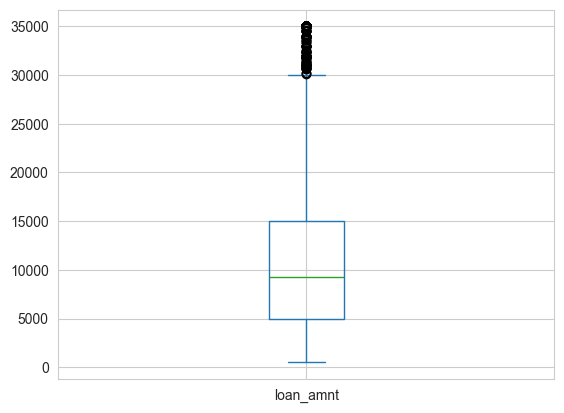

In [417]:
df['loan_amnt'].plot.box()

In [418]:
# Creating loan_amnt buckets
bins = [0, 5000, 10000, 15000, 20000, df['loan_amnt'].max()]
labels = ['0 - 5k', '5k - 10k', '10k - 15k', '15k - 20k', '20k - above']

df['loan_amnt_bucket'] = pd.cut(df['loan_amnt'], bins=bins, labels=labels, right=False)
#df['loan_amnt_bucket'] = df['loan_amnt_bucket'].astype('object')

In [419]:
df[['loan_amnt','loan_amnt_bucket']].head(5)

,loan_amnt,loan_amnt_bucket
0,5000,5k - 10k
1,2500,0 - 5k
2,2400,0 - 5k
3,10000,10k - 15k
5,5000,5k - 10k


#### 2.8.2.2 Bucket int_rate

In [420]:
# Check the loan_amnt range
df['int_rate'].describe()

count    36642.000000
mean        11.887884
std          3.667161
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

<Axes: >

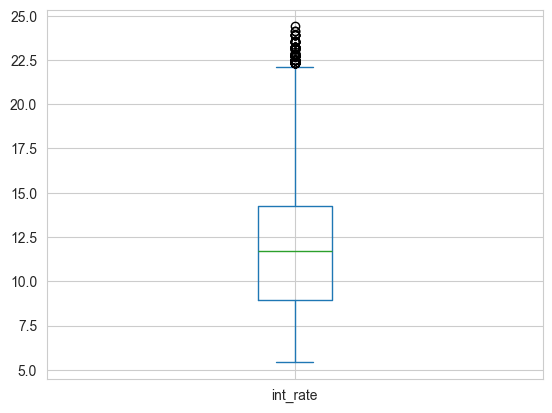

In [421]:
df['int_rate'].plot.box()

In [422]:
# Creating int_rate buckets
bins = [5, 8, 11, 14, 17, 20, df['int_rate'].max()]
labels = ['5% - 8%', '8% - 11%', '11% - 14%', '14% - 17%', '17% - 20%', '20% +']

df['int_rate_bucket'] = pd.cut(df['int_rate'], bins=bins, labels=labels, right=False)
#df['int_rate_bucket'] = df['int_rate_bucket'].astype('object')

In [423]:
df[['int_rate','int_rate_bucket']].head(5)

,int_rate,int_rate_bucket
0,10.65,8% - 11%
1,15.27,14% - 17%
2,15.96,14% - 17%
3,13.49,11% - 14%
5,7.90,5% - 8%


#### 2.8.2.3 Bucket annual_inc

In [424]:
# Check the annual_inc range
df['annual_inc'].describe()

count     36642.000000
mean      60829.831120
std       27717.831464
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77704.050000
max      140000.000000
Name: annual_inc, dtype: float64

<Axes: >

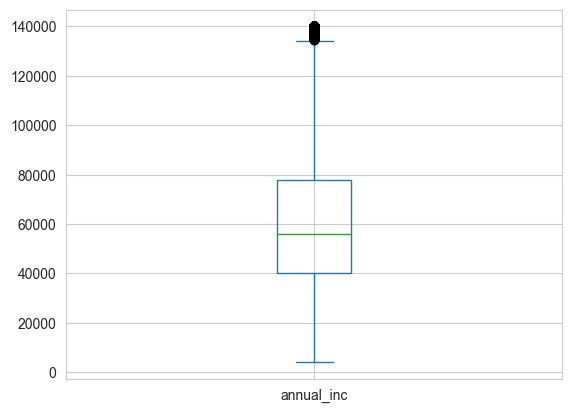

In [425]:
df['annual_inc'].plot.box()

In [426]:
# Creating annual_inc buckets
bins = [0, 40000, 55000, 70000, 85000, 100000, df['annual_inc'].max()]
labels = ['0 - 40k', '40k - 55k', '55k - 70k', '70k - 85k', '85k - 100k', '100k +']

df['annual_inc_bucket'] = pd.cut(df['annual_inc'], bins=bins, labels=labels, right=False)
#df['annual_inc_bucket'] = df['annual_inc_bucket'].astype('object')

In [427]:
df[['annual_inc','annual_inc_bucket']].head(5)

,annual_inc,annual_inc_bucket
0,24000.0,0 - 40k
1,30000.0,0 - 40k
2,12252.0,0 - 40k
3,49200.0,40k - 55k
5,36000.0,0 - 40k


#### 2.8.2.4 Bucket dti

In [428]:
# Check the annual_inc range
df['dti'].describe()

count    36642.000000
mean        13.447256
std          6.661561
min          0.000000
25%          8.350000
50%         13.580000
75%         18.717500
max         29.990000
Name: dti, dtype: float64

<Axes: >

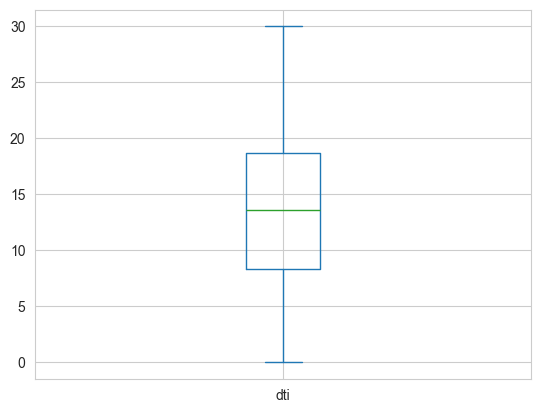

In [429]:
df['dti'].plot.box()

In [430]:
# Creating dti buckets
bins = [0, 8, 12, 16, 20, df['dti'].max()]
labels = ['0 - 8', '8 - 12', '12 - 16', '16 - 20', '20 +']

df['dti_bucket'] = pd.cut(df['dti'], bins=bins, labels=labels, right=False)
#df['dti_bucket'] = df['dti_bucket'].astype('object')

In [431]:
df[['dti','dti_bucket']].head(5)

,dti,dti_bucket
0,27.65,20 +
1,1.00,0 - 8
2,8.72,8 - 12
3,20.00,20 +
5,11.20,8 - 12


#### 2.8.2.5 Bucket revol_util

In [432]:
# Check the annual_inc range
df['revol_util'].describe()

count    36642.000000
mean        48.661597
std         28.263245
min          0.000000
25%         25.300000
50%         48.900000
75%         72.100000
max         99.900000
Name: revol_util, dtype: float64

<Axes: >

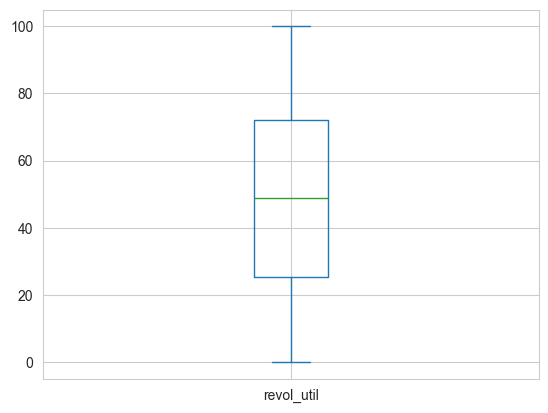

In [433]:
df['revol_util'].plot.box()

In [434]:
# Creating dti buckets
bins = [0, 20, 40, 60, 80, df['revol_util'].max()+1]
labels = ['0 - 20', '20 - 40', '40 - 60', '60 - 80', '80 +']

df['revol_util_bucket'] = pd.cut(df['revol_util'], bins=bins, labels=labels, right=False)
#df['Category'] = df['Category'].astype('object')

In [435]:
df[['revol_util','revol_util_bucket']].head(5)

,revol_util,revol_util_bucket
0,83.7,80 +
1,9.4,0 - 20
2,98.5,80 +
3,21.0,20 - 40
5,28.3,20 - 40


## 3. Data Analysis

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36642 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36642 non-null  int64         
 1   term                  36642 non-null  object        
 2   int_rate              36642 non-null  float64       
 3   installment           36642 non-null  float64       
 4   grade                 36642 non-null  object        
 5   sub_grade             36642 non-null  object        
 6   emp_length            36642 non-null  category      
 7   home_ownership        36642 non-null  object        
 8   annual_inc            36642 non-null  float64       
 9   verification_status   36642 non-null  object        
 10  issue_d               36642 non-null  datetime64[ns]
 11  loan_status           36642 non-null  object        
 12  purpose               36642 non-null  object        
 13  addr_state           

The following list describes the columns/variables we have after cleaning and manipulating the dataset:

- Categorical veriables
  - Ordered
    - grade
    - sub_grade
    - emp_length
    - issue_d_month
    - issue_d_year
    - loan_amnt_bucket
    - int_rate_bucket
    - annual_inc_bucket
    - dti_bucket
    - revol_util_bucket
  
  - Unordered
    - term
    - home_ownership
    - verification_status
    - loan_status
    - purpose
    - addr_state
      
  
- Quantitative veriables
    - loan_amnt
    - int_rate
    - installment
    - annual_inc
    - issue_d
    - dti
    - open_acc
    - revol_util
    - total_acc
- Discrete Quantitative
    - inq_last_6mths
    - pub_rec
    - pub_rec_bankruptcies


### 3.1 Univariate Analysis

#### 3.1.1 Ordered Categorical Columns

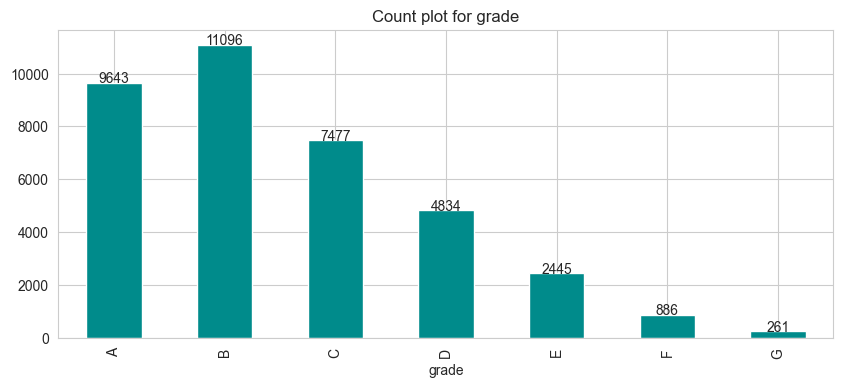

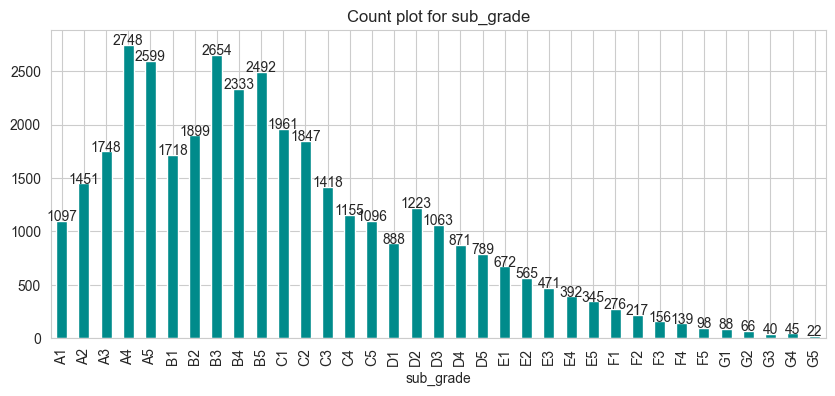

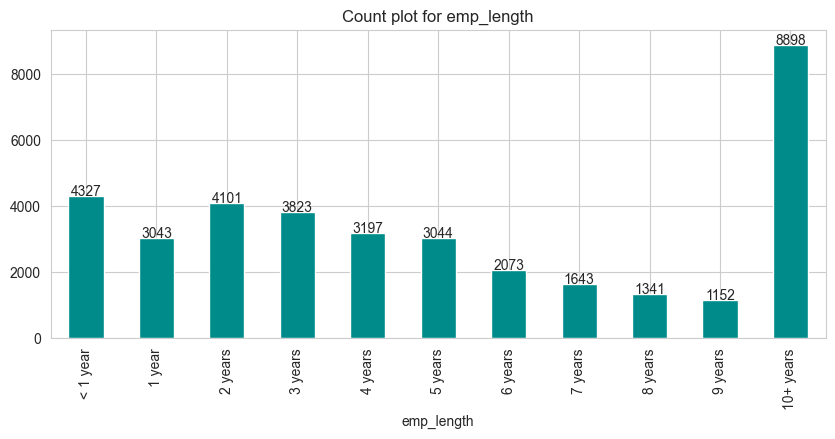

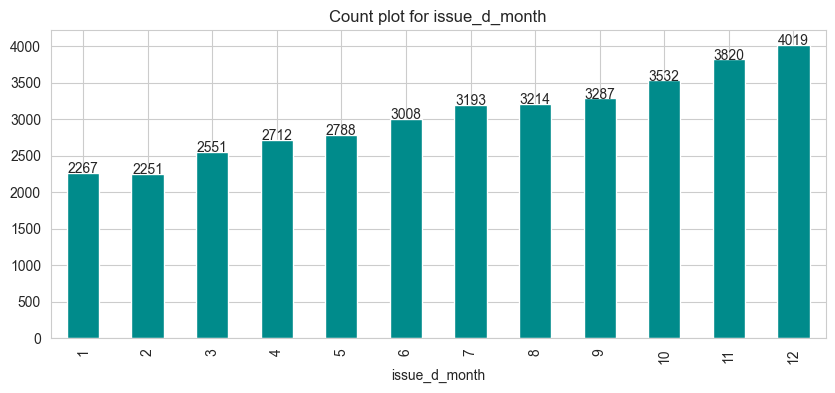

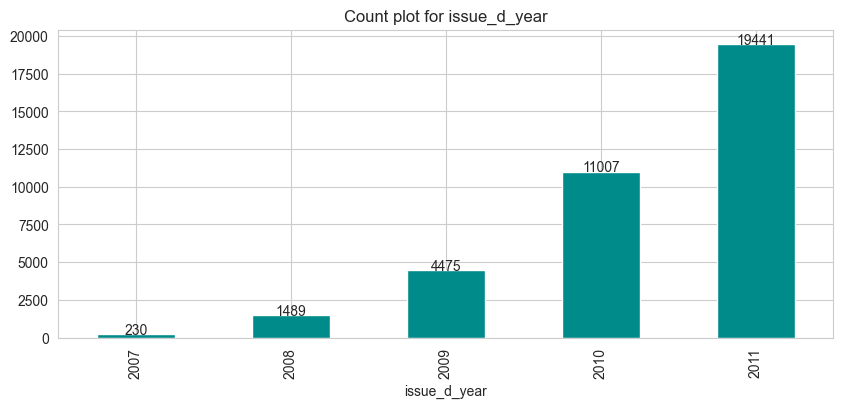

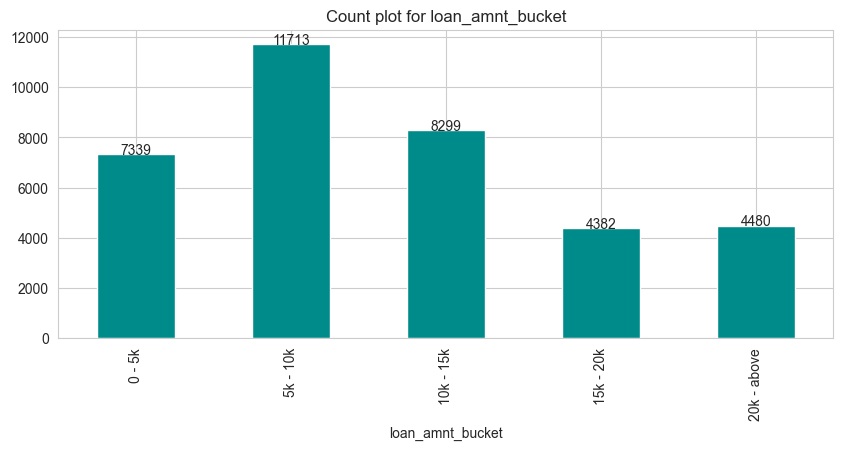

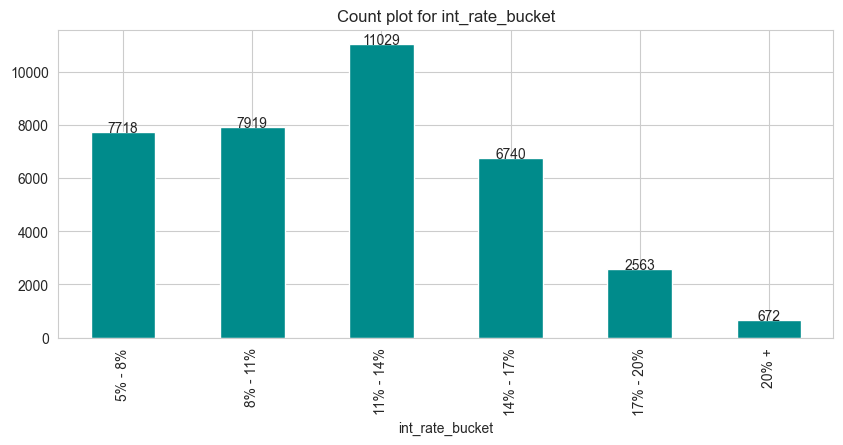

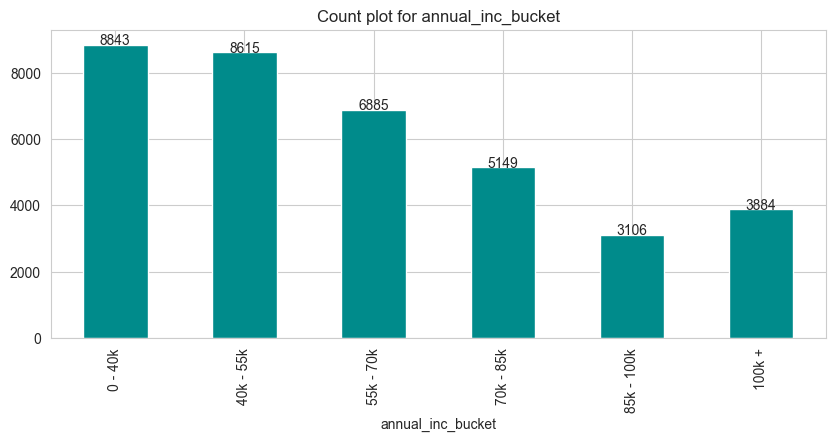

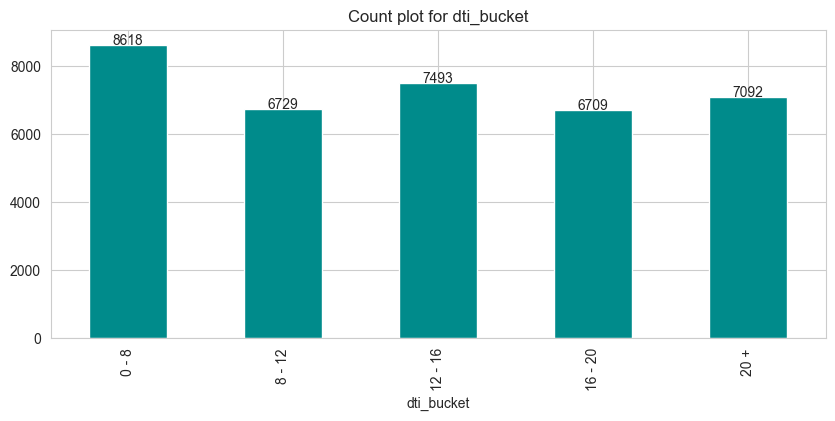

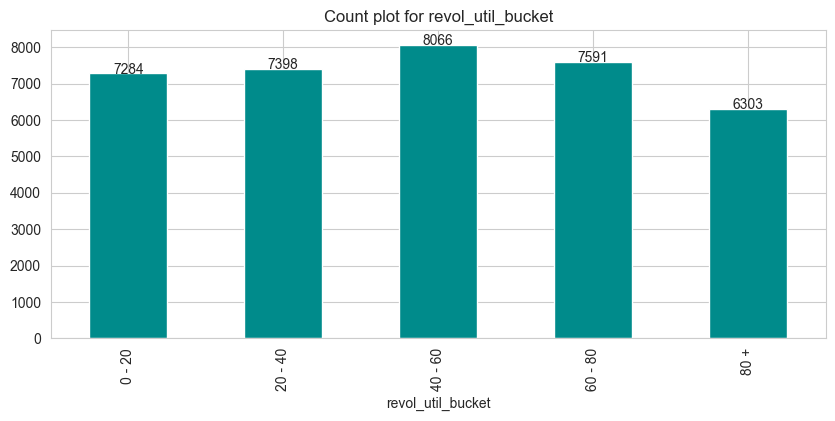

In [437]:
# draw count plot for each bucket in the column
sns.set_style("whitegrid")
colors = ['darkcyan']
#style must be one of white, dark, whitegrid, darkgrid, ticks
for column in ['grade','sub_grade','emp_length','issue_d_month','issue_d_year',
               'loan_amnt_bucket','int_rate_bucket','annual_inc_bucket',
               'dti_bucket','revol_util_bucket']: 
    plt.figure(figsize=(10,4))
    bar_plot =df.groupby([column])[column].count().plot.bar(color=colors)

    for p in bar_plot.patches:
        height = p.get_height()
        bar_plot.text(p.get_x() + p.get_width() / 2., height, int(height), ha="center")
        
    plt.title('Count plot for '+column)
    plt.show()

#### 3.1.2 Unordered Categorical Columns

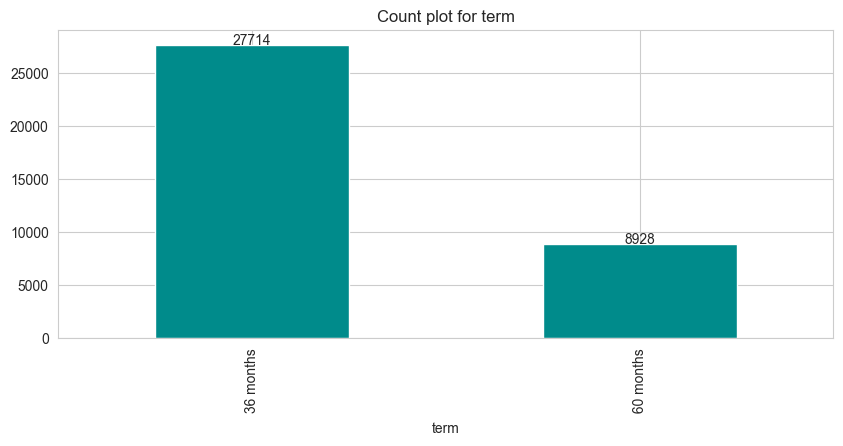

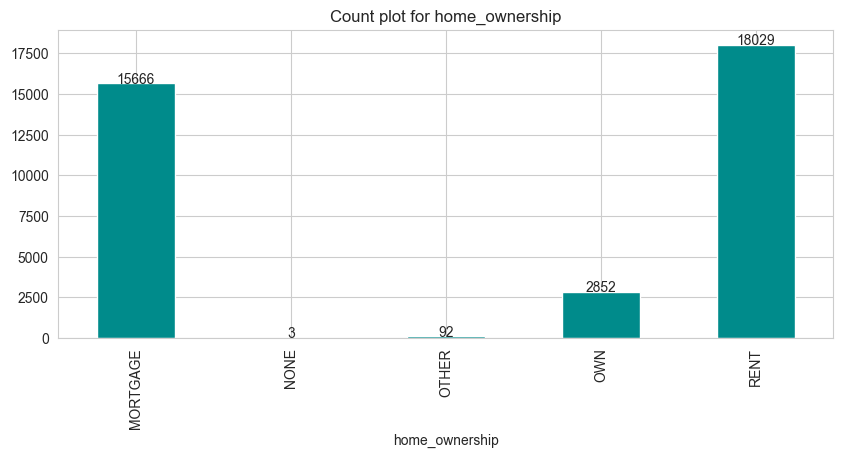

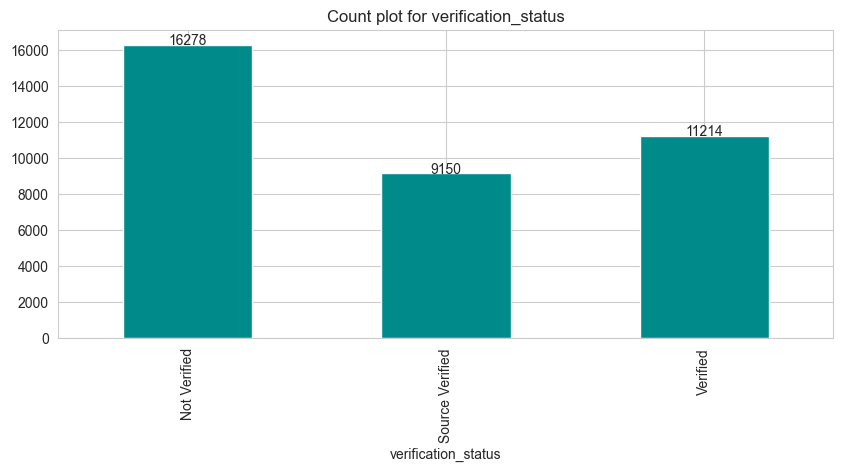

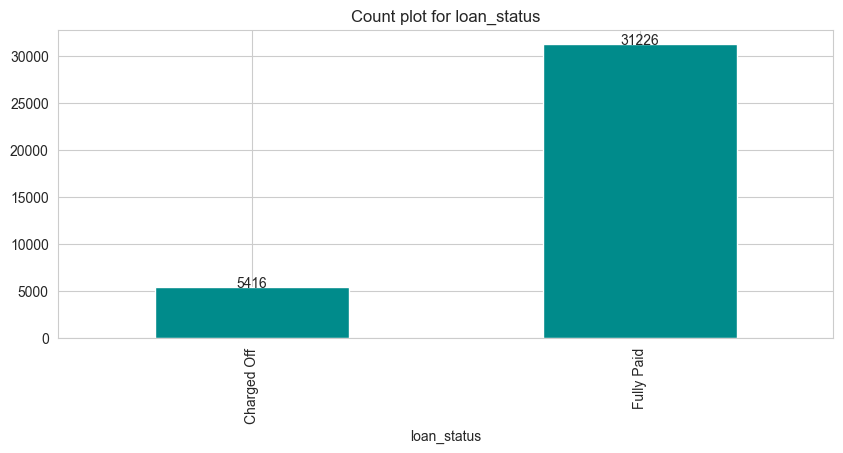

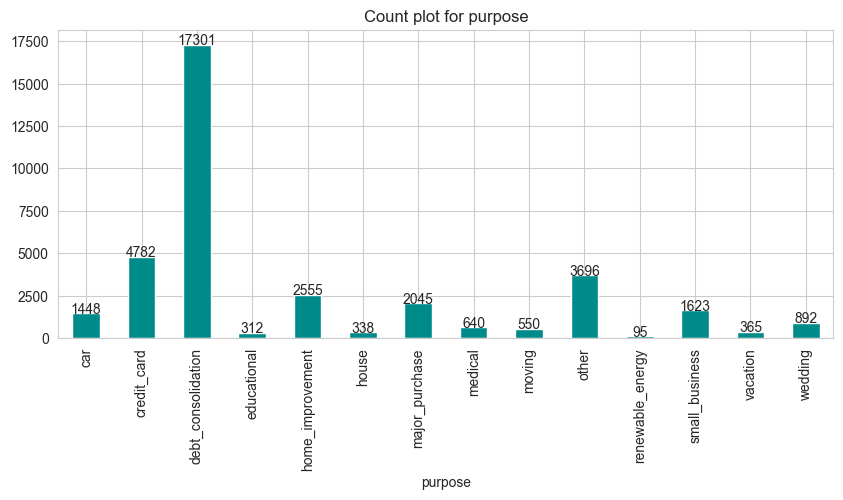

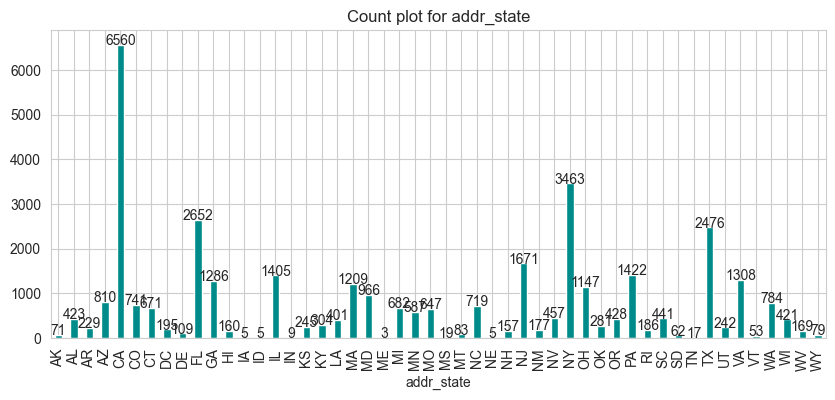

In [438]:
# draw count plot for each bucket in the column
sns.set_style("whitegrid")
colors = ['darkcyan']
#style must be one of white, dark, whitegrid, darkgrid, ticks
for column in ['term','home_ownership','verification_status','loan_status','purpose',
               'addr_state']: 
    plt.figure(figsize=(10,4))
    bar_plot =df.groupby([column])[column].count().plot.bar(color=colors)

    for p in bar_plot.patches:
        height = p.get_height()
        bar_plot.text(p.get_x() + p.get_width() / 2., height, int(height), ha="center")
        
    plt.title('Count plot for '+column)
    plt.show()

#### 3.1.3 Quantitative Columns

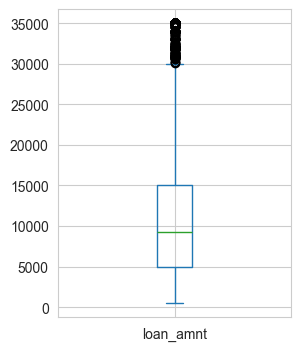

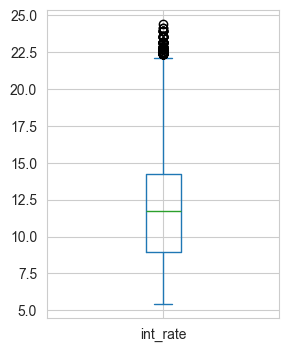

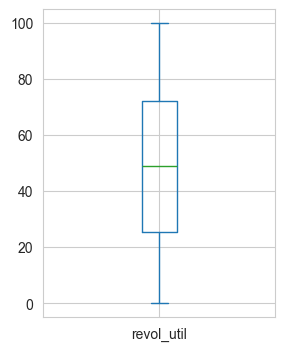

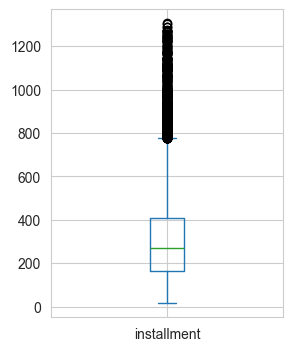

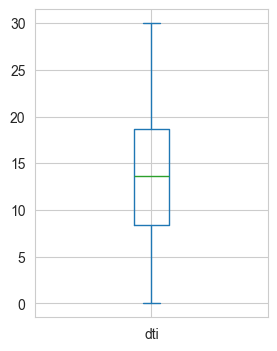

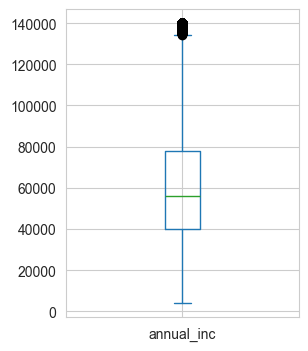

In [439]:
# draw boxplot for each column
sns.set_style("whitegrid")
for column in ['loan_amnt', 'int_rate','revol_util', 
            'installment', 'dti', 'annual_inc']:
    plt.figure(figsize=(3,4))
    df[column].plot.box()
    plt.show()

#### 3.1.4 Quantitative(Discrete) Columns

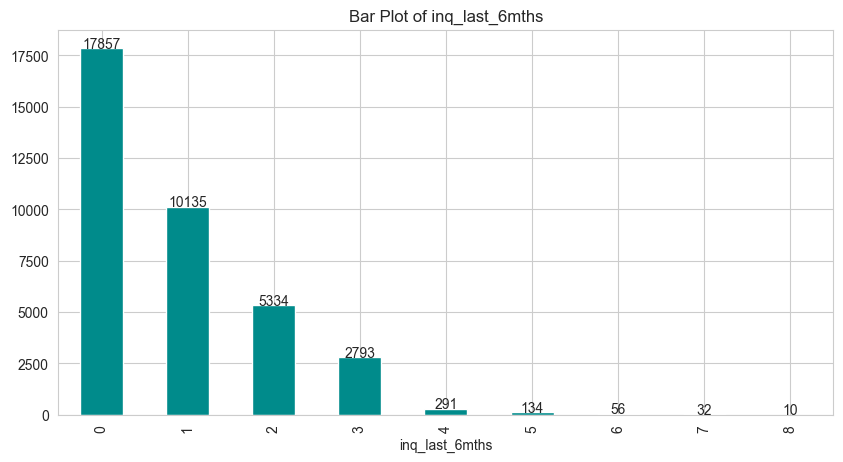

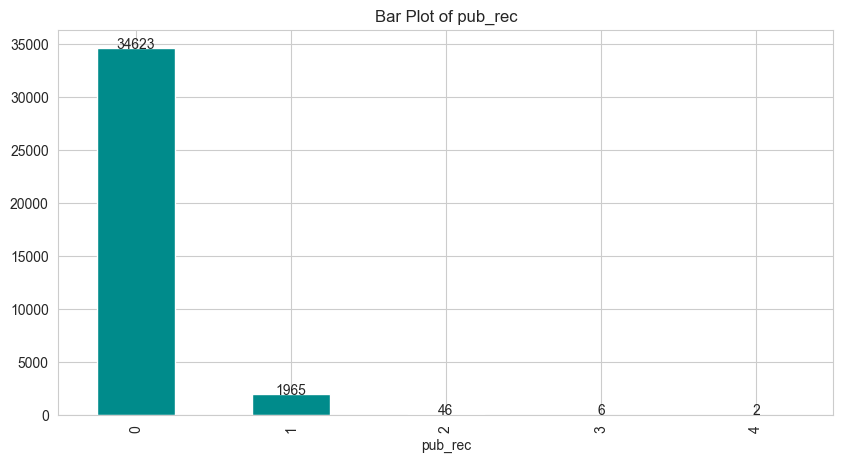

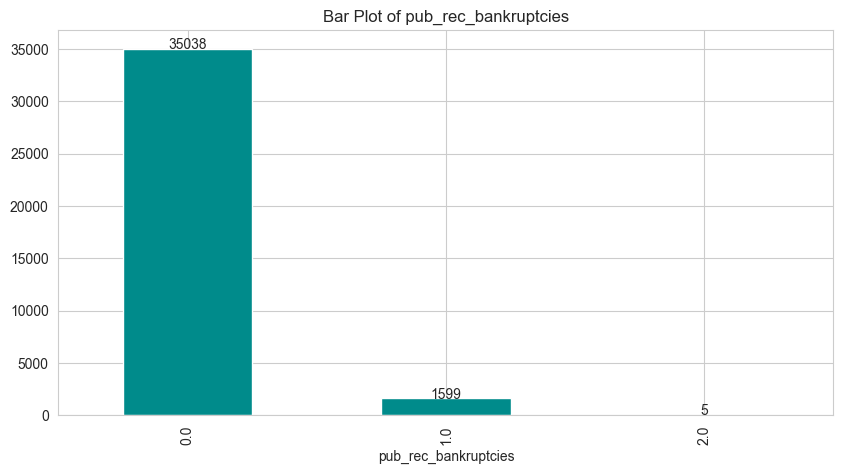

In [440]:
# draw count plot for each bucket in the column
sns.set_style("whitegrid")
colors = ['darkcyan']
#style must be one of white, dark, whitegrid, darkgrid, ticks
for column in ['inq_last_6mths','pub_rec','pub_rec_bankruptcies']: 
    plt.figure(figsize=(10,5))
    bar_plot =df.groupby([column])[column].count().plot.bar(color=colors)

    for p in bar_plot.patches:
        height = p.get_height()
        bar_plot.text(p.get_x() + p.get_width() / 2., height, int(height), ha="center")
        
    plt.title('Bar Plot of '+column)
    plt.show()

#### OBSERVATIONS

- Highest Number of Customers are having Grade B followed by Grade A. Followed by C,D, E, F and G. G having the lease Number of Customers. This maybe bacuse the company is cautious towards providing loan to persons havinglower Grades.

- sub_grade also have similar trend, except that there is a sudden rise in A4, A5 and a dip in B2, B3. The reason for this maybe the LC is favouring bordrline customers and moving them to A, to offer better rates.

- For the Employment length, 10+ years bracket has the highest customers.

- No of loans issues per year has increased considerably year on year.

- Most customers takes loan between 5000 - 15000 USD.

- Most customer has interest rate between 9-14%

- Income of most customers falls between 40000 and 80000 USD.

- dti and revol_util are spread evenly along the range

- Most of the customers opt for 36 month loan.

- Customers having Own home is very low.

- Most of the customers are not fully verified. 

- Most of the loans are for debt consolidation

- CA, NY and FL are the three highest customer states.

### 3.2 Segmented Univariate Analysis

Column loan_status is our primary column for analysis. So, we will do bivariate analysis of other columns with loan_status.

#### 3.2.1 Ordered Categorical Columns


-------------------- grade vs loan_status ------------------


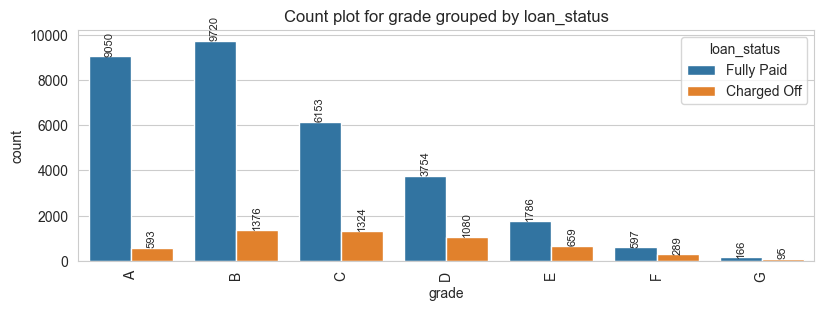

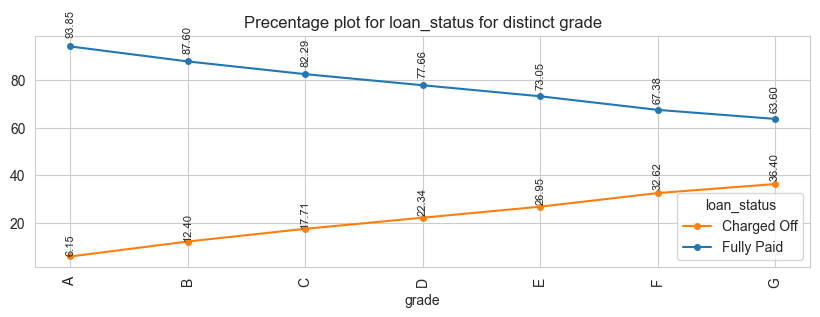


-------------------- sub_grade vs loan_status ------------------


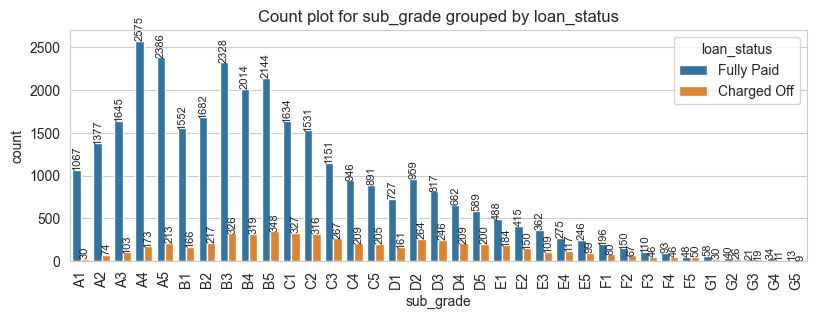

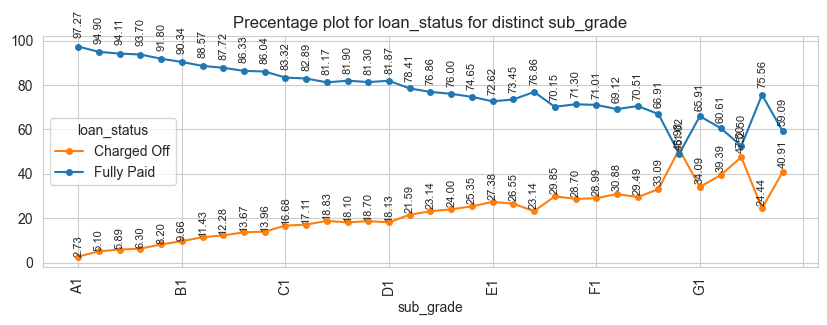


-------------------- emp_length vs loan_status ------------------


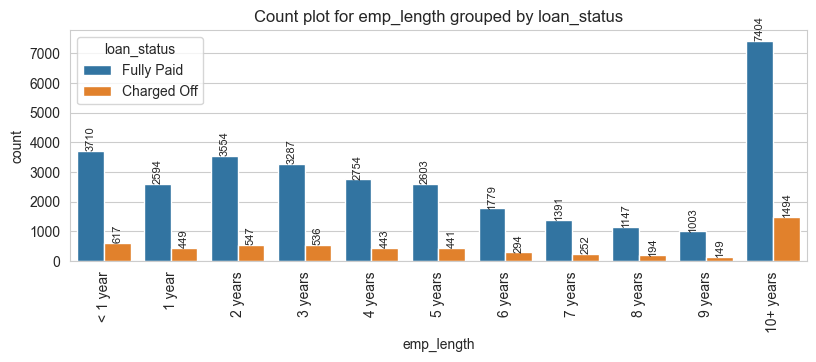

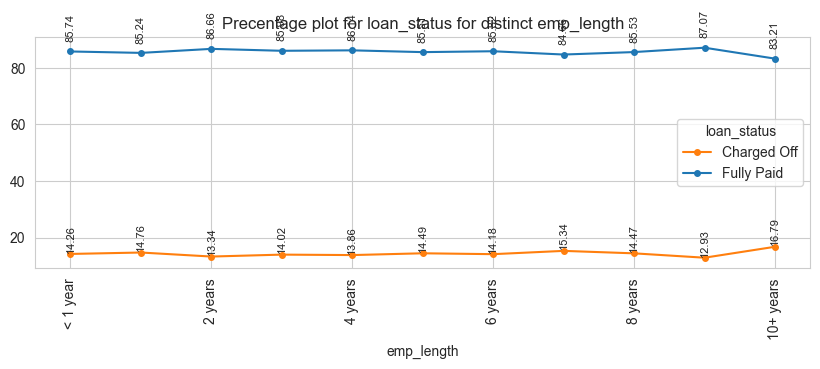


-------------------- issue_d_month vs loan_status ------------------


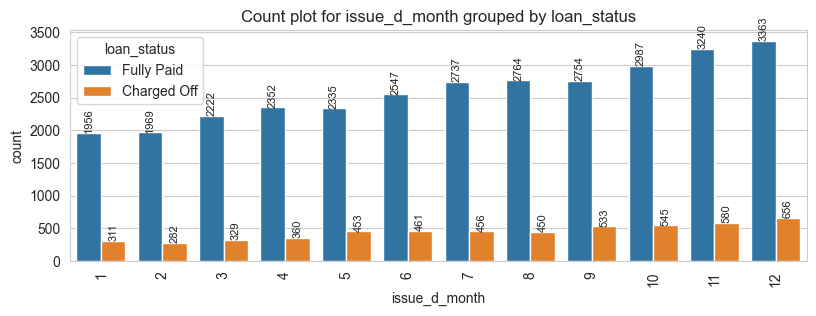

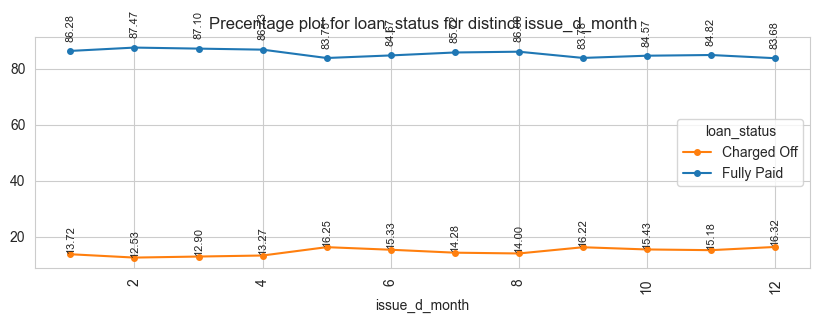


-------------------- issue_d_year vs loan_status ------------------


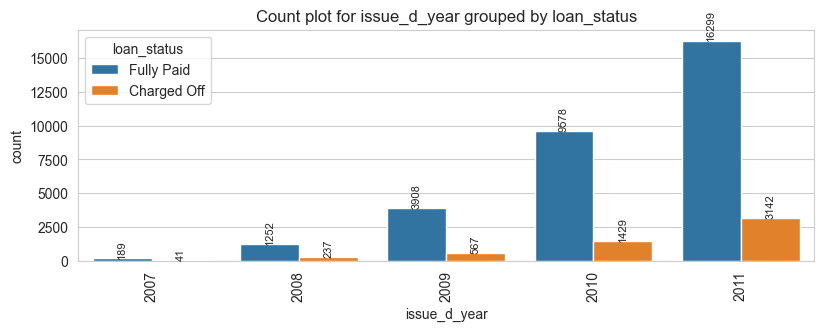

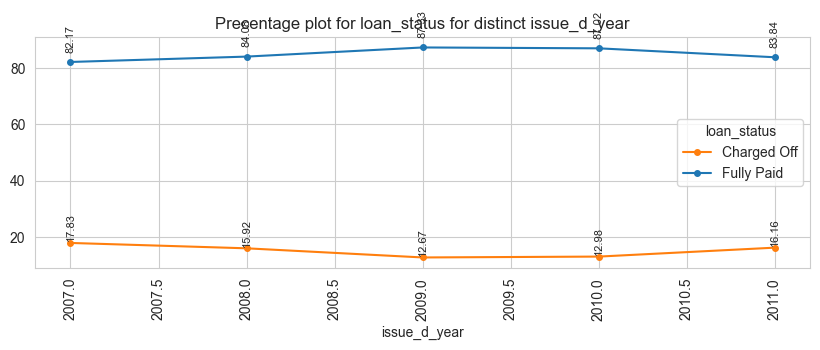


-------------------- loan_amnt_bucket vs loan_status ------------------


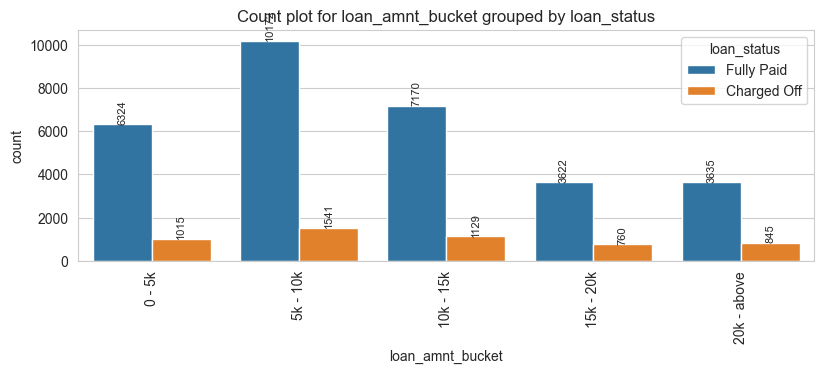

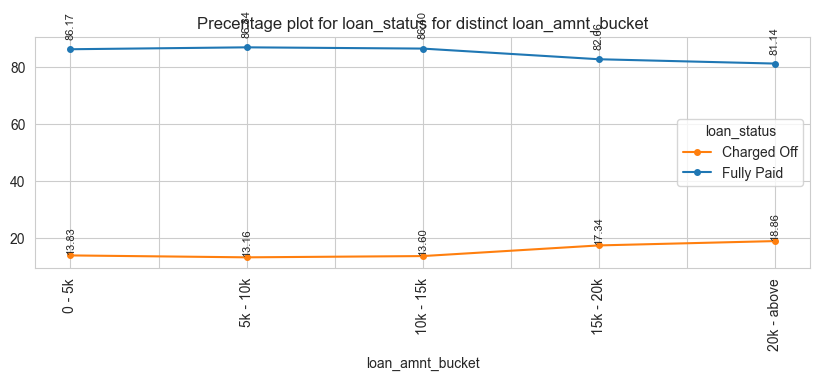


-------------------- int_rate_bucket vs loan_status ------------------


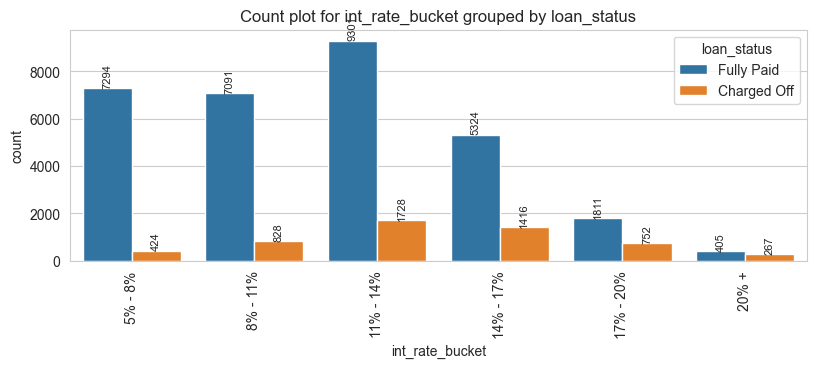

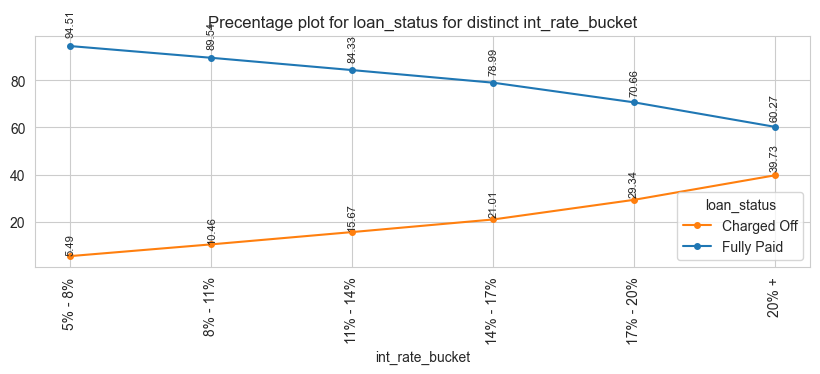


-------------------- annual_inc_bucket vs loan_status ------------------


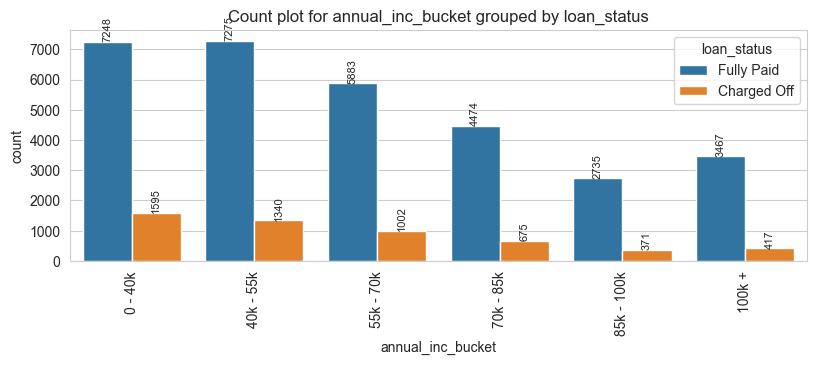

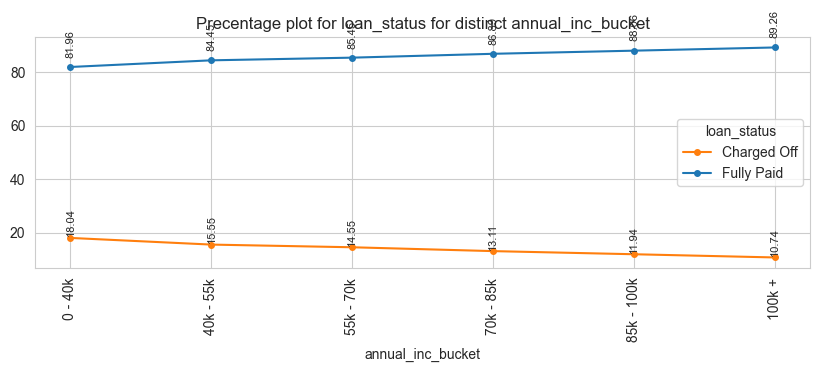


-------------------- dti_bucket vs loan_status ------------------


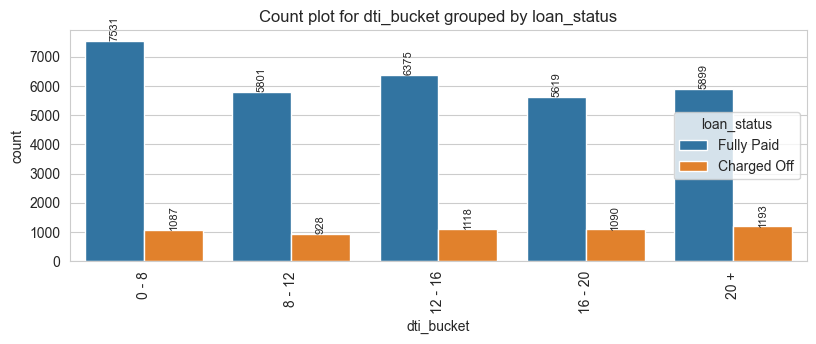

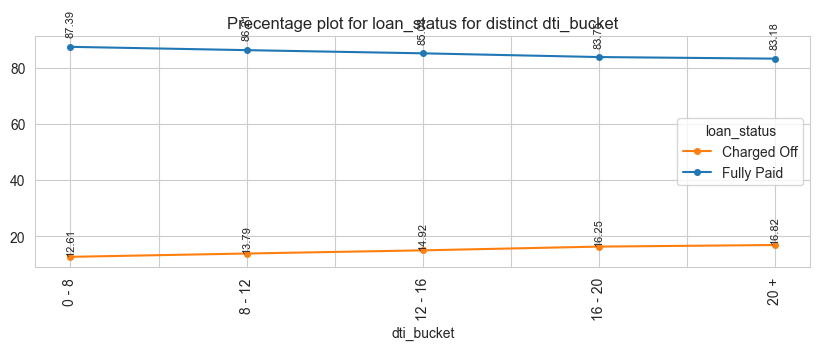


-------------------- revol_util_bucket vs loan_status ------------------


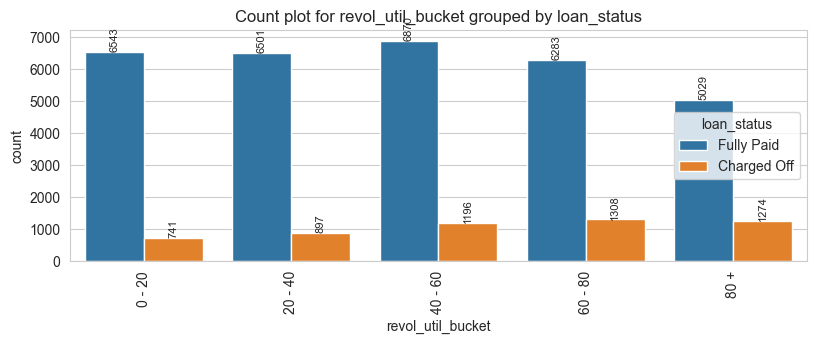

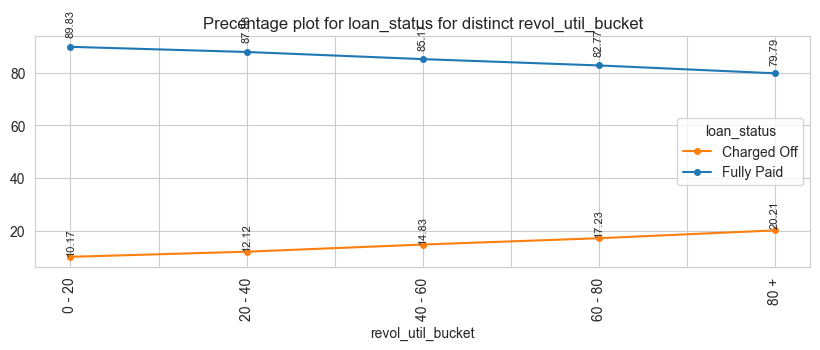

In [441]:
# Analysing each column with segmentation on loan_status
sns.set_style("whitegrid")

custom_palette = {
    'Fully Paid': '#1f77b4',  # Blue
    'Charged Off': '#ff7f0e'  # Orange
}
colors = ['#ff7f0e','#1f77b4']

for column in ['grade','sub_grade','emp_length','issue_d_month','issue_d_year', 
               'loan_amnt_bucket', 'int_rate_bucket','annual_inc_bucket',
               'dti_bucket','revol_util_bucket']: 
    print()
    print('-------------------- '+column+ ' vs loan_status ------------------')
    plt.figure(figsize=(9.5,3))

    # Draw the countplot
    # if column dtype is not 'category' then we need to order the x-axis
    if df[column].dtype=='category':
        ax = sns.countplot(x = column, hue = 'loan_status', data = df, palette=custom_palette)
    else:
        ax = sns.countplot(x = column, hue = 'loan_status', data = df, palette=custom_palette,
                     order = sorted(df[column].unique()))
    #df[df['loan_status']=="Charged Off"].groupby([column])[column].count().plot()
    for container in ax.containers: ax.bar_label(container, fmt='%d', label_type='edge',
                                                 fontsize=8, rotation=90)
    plt.xticks(rotation=90, fontsize=10, ha='center')
    plt.title('Count plot for '+column+ ' grouped by loan_status')
    plt.show()

    # Draw the percentage plot
    pivot = pd.pivot_table(data=df, index=column, columns="loan_status", aggfunc='size', fill_value=0)
    pivot = pivot.apply(lambda x: round(x/x.sum()*100,2), axis=1)
    ax = pivot.plot(figsize=(10, 3), color=colors, marker='o', markersize=4, linestyle='-')

    for line in ax.lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.2f}".format(y)
            plt.text(x, 1.04*y, label, va='bottom', ha='center',fontsize=8, rotation=90)

        
    plt.xticks(rotation=90, fontsize=10, ha='center')
    plt.title("Precentage plot for loan_status for distinct "+column)
    plt.show()

#### 3.2.2 Unordered Categorical Columns


-------------------- term VS loan_status ------------------


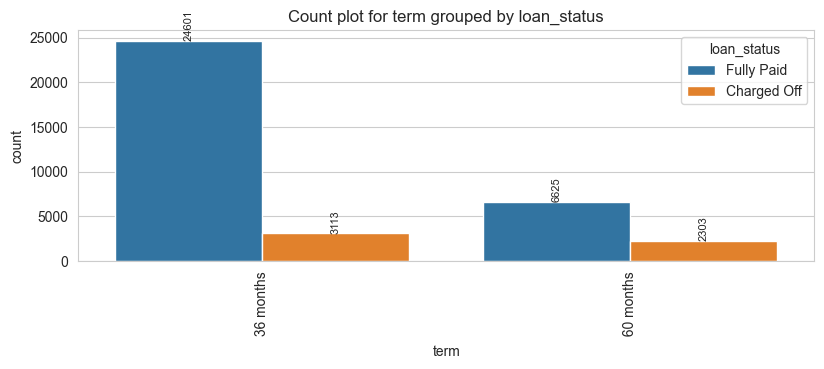

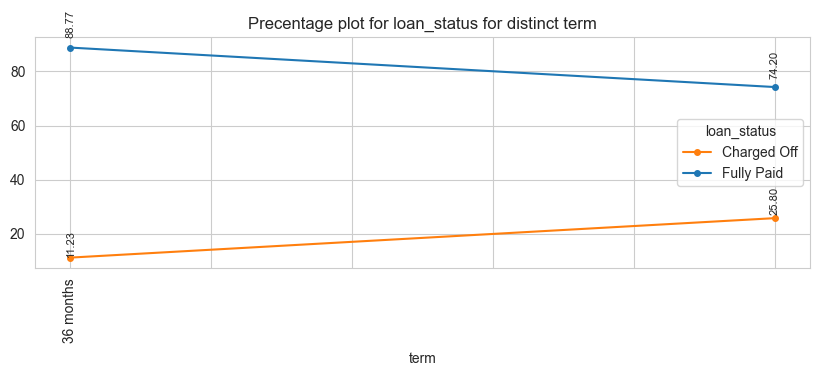


-------------------- home_ownership VS loan_status ------------------


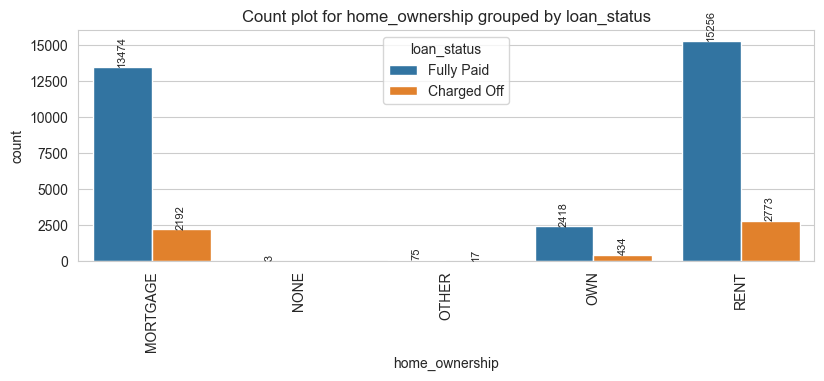

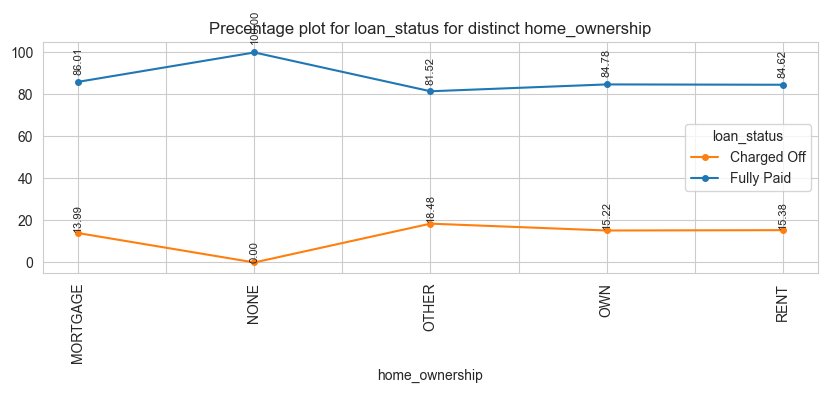


-------------------- verification_status VS loan_status ------------------


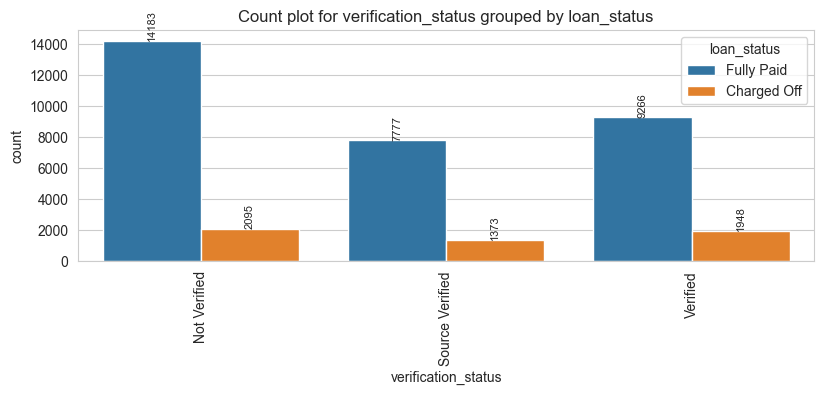

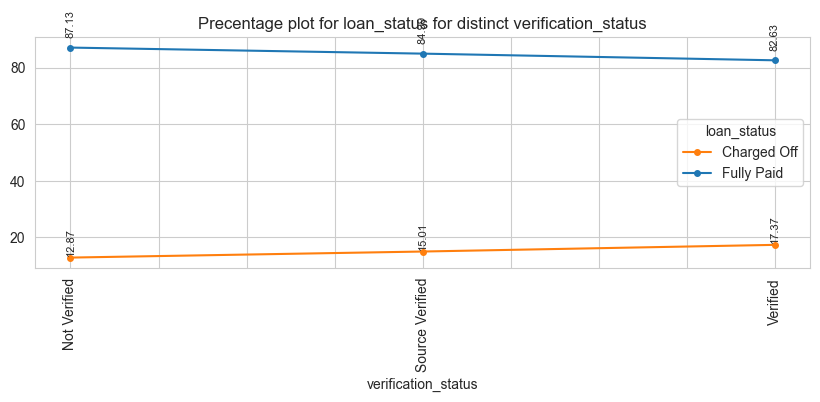


-------------------- purpose VS loan_status ------------------


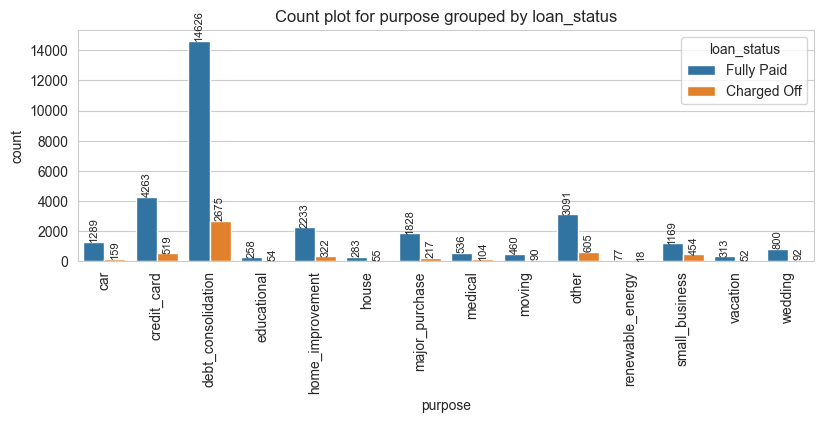

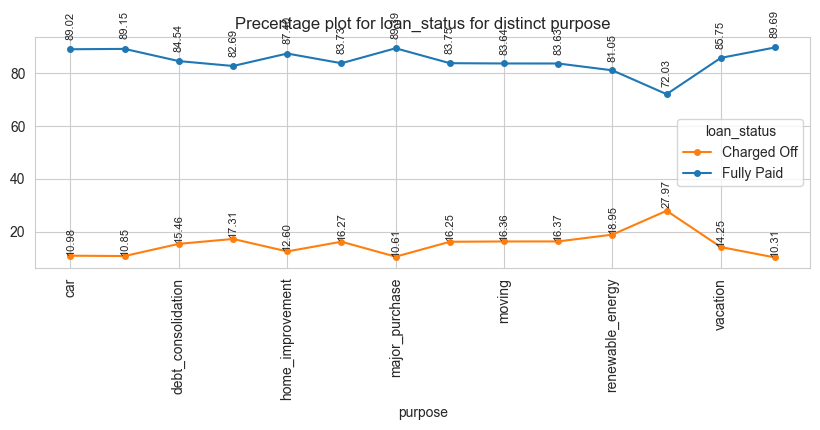


-------------------- addr_state VS loan_status ------------------


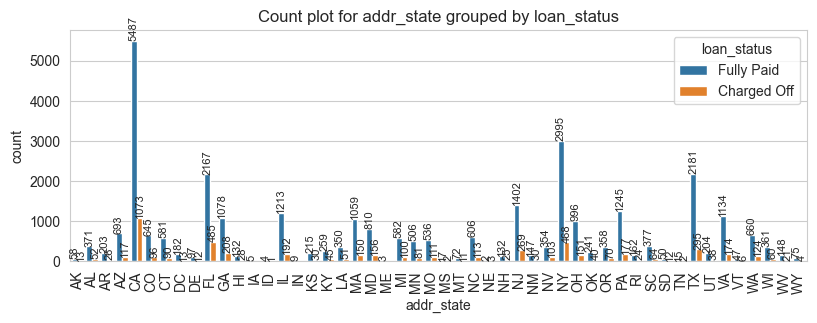

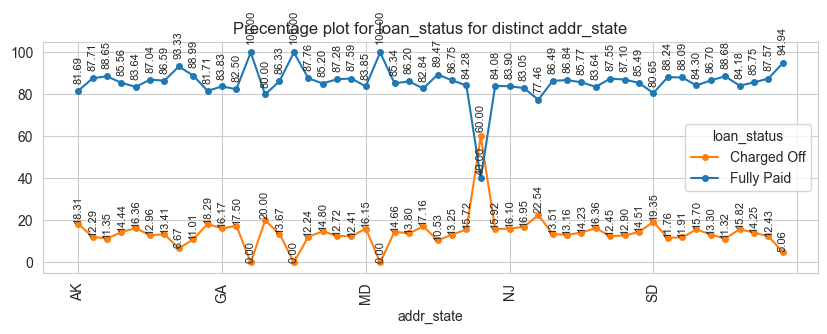

In [442]:
# Analysing each column with segmentation on loan_status

sns.set_style("whitegrid")

custom_palette = {
    'Fully Paid': '#1f77b4',  # Blue
    'Charged Off': '#ff7f0e'  # Orange
}
colors = ['#ff7f0e','#1f77b4']

#style must be one of white, dark, whitegrid, darkgrid, ticks
for column in ['term','home_ownership','verification_status',
               'purpose','addr_state',]: 
    print()
    print('-------------------- '+column+ ' VS loan_status ------------------')
    plt.figure(figsize=(9.5,3))

    # if column dtype is not 'category' then we need to order the x-axis
    if df[column].dtype=='category':
        ax = sns.countplot(x = column, hue = 'loan_status', data = df, palette=custom_palette)
    else:
        ax = sns.countplot(x = column, hue = 'loan_status', data = df, palette=custom_palette,
                     order = sorted(df[column].unique()))
    #df[df['loan_status']=="Charged Off"].groupby([column])[column].count().plot()
    for container in ax.containers: ax.bar_label(container, fmt='%d', label_type='edge',
                                                fontsize=8, rotation=90)
    plt.xticks(rotation=90, fontsize=10, ha='center')
    plt.title('Count plot for '+column+ ' grouped by loan_status')
    plt.show()

    pivot = pd.pivot_table(data=df, index=column, columns="loan_status", aggfunc='size', fill_value=0)
    pivot = pivot.apply(lambda x: round(x/x.sum()*100,2), axis=1)
    ax = pivot.plot(figsize=(10, 3), color=colors, marker='o', markersize=4, linestyle='-')

    for line in ax.lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.2f}".format(y)
            plt.text(x, 1.04*y, label, va='bottom', ha='center',fontsize=8,rotation=90)

        
    plt.xticks(rotation=90, fontsize=10, ha='center')
    #plt.tight_layout()
    plt.title("Precentage plot for loan_status for distinct "+column)
    plt.show()

#### 3.2.4 Quantitative Columns


For the following columns, ordered category buckets has been which is analysed under bivariate colums. We will not be analysing it in this section.

- loan_amnt 
- int_rate
- annual_inc
- issue_d
- dti
- revol_util

We will have a look at the following columns in this section:

- installment
- open_acc
- total_acc

<Axes: xlabel='installment', ylabel='loan_status'>

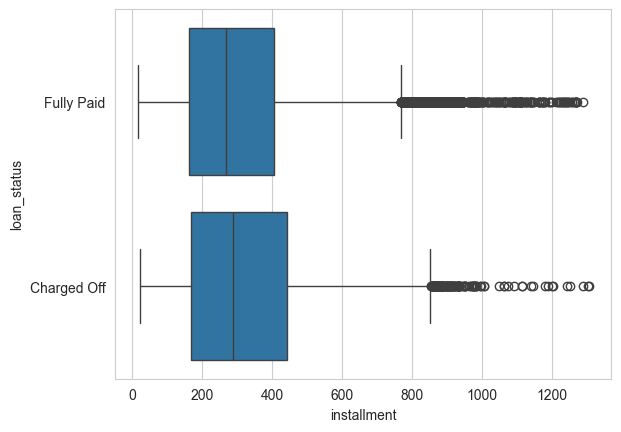

In [443]:
# Boxplot installemnt against distinct loan_status
sns.boxplot(data=df[['installment','loan_status']], x='installment', y='loan_status')

<Axes: xlabel='open_acc', ylabel='loan_status'>

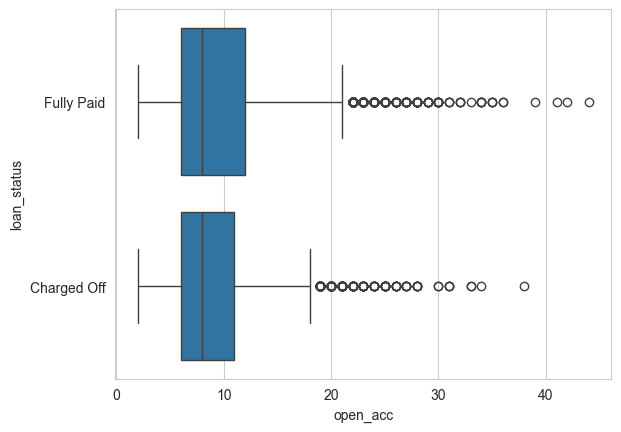

In [444]:
# Boxplot open_acc against distinct loan_status
sns.boxplot(data=df[['open_acc','loan_status']], x='open_acc', y='loan_status')

<Axes: xlabel='total_acc', ylabel='loan_status'>

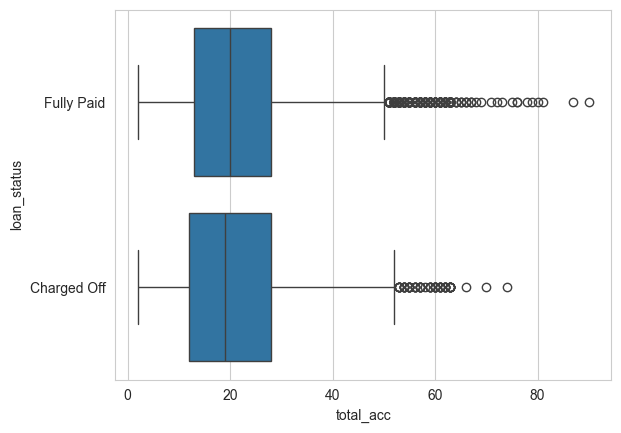

In [445]:
# Boxplot total_acc against distinct loan_status
sns.boxplot(data=df[['total_acc','loan_status']], x='total_acc', y='loan_status')

#### 3.2.4 Quantitative(Discrete) Columns


-------------------- inq_last_6mths VS loan_status ------------------


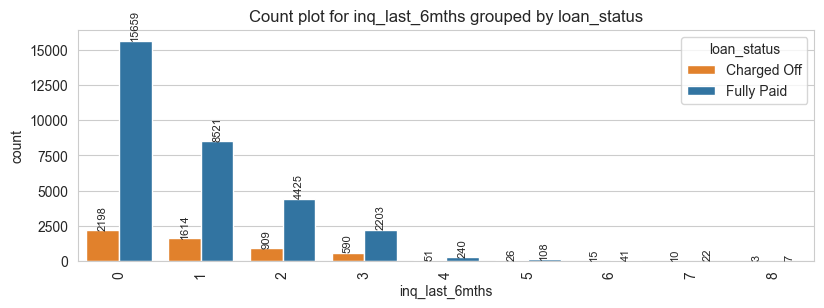

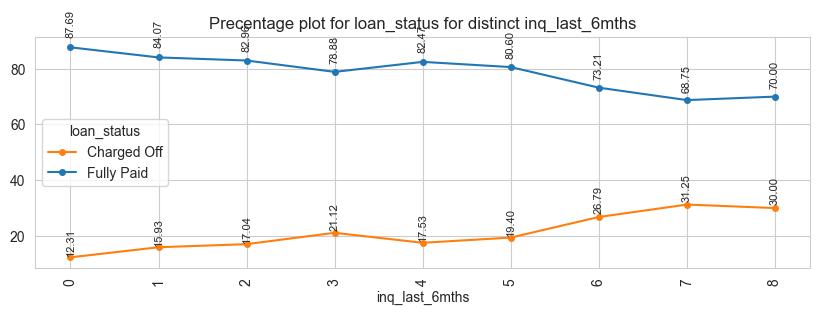


-------------------- pub_rec VS loan_status ------------------


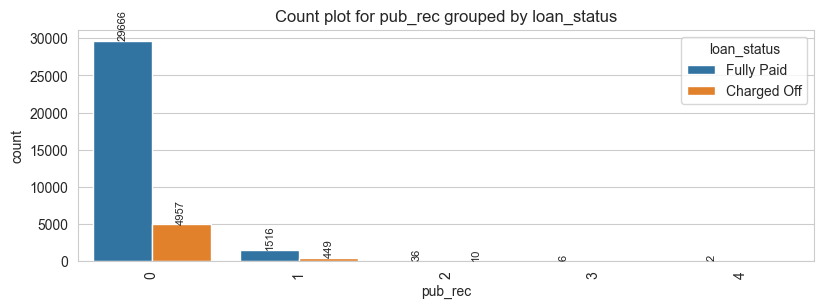

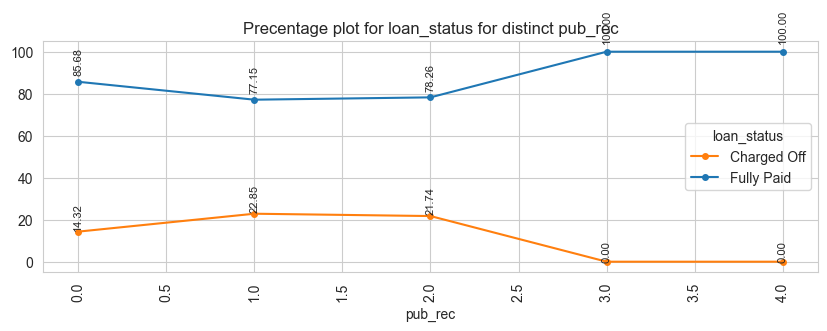


-------------------- pub_rec_bankruptcies VS loan_status ------------------


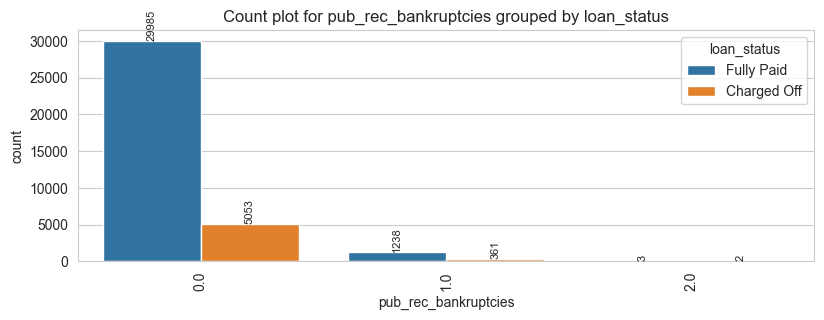

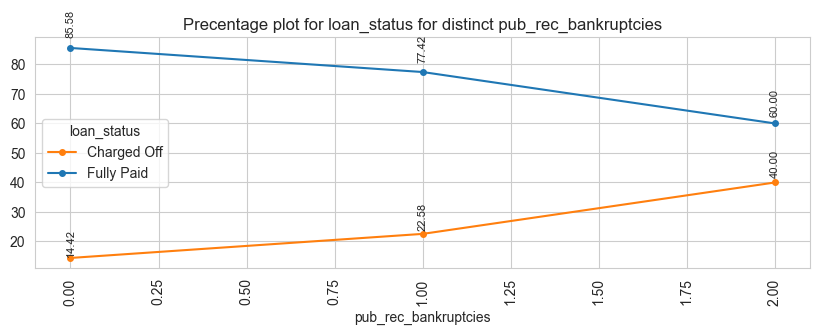

In [446]:
sns.set_style("whitegrid")

custom_palette = {
    'Fully Paid': '#1f77b4',  # Blue
    'Charged Off': '#ff7f0e'  # Orange
}
colors = ['#ff7f0e','#1f77b4']

#style must be one of white, dark, whitegrid, darkgrid, ticks
for column in ['inq_last_6mths','pub_rec','pub_rec_bankruptcies']: 
    print()
    print('-------------------- '+column+ ' VS loan_status ------------------')
    plt.figure(figsize=(9.5,3))
    
    # Plotting the Bar Plot
    # if column dtype is not 'category' then we need to order the x-axis
    if df[column].dtype=='category':
        ax = sns.countplot(x = column, hue = 'loan_status', data = df, palette=custom_palette)
    else:
        ax = sns.countplot(x = column, hue = 'loan_status', data = df, palette=custom_palette,
                     order = sorted(df[column].unique()))
    #df[df['loan_status']=="Charged Off"].groupby([column])[column].count().plot()
    for container in ax.containers: ax.bar_label(container, fmt='%d', label_type='edge',
                                                fontsize=8, rotation=90)
    plt.xticks(rotation=90, fontsize=10, ha='center')
    plt.title('Count plot for '+column+ ' grouped by loan_status')
    plt.show()

    #Plotting the Percentage Plot
    pivot = pd.pivot_table(data=df, index=column, columns="loan_status", aggfunc='size', fill_value=0)
    pivot = pivot.apply(lambda x: round(x/x.sum()*100,2), axis=1)
    ax = pivot.plot(figsize=(10, 3), color=colors, marker='o', markersize=4, linestyle='-')

    for line in ax.lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.2f}".format(y)
            plt.text(x, 1.04*y, label, va='bottom', ha='center',fontsize=8,rotation=90)

        
    plt.xticks(rotation=90, fontsize=10, ha='center')
    #plt.tight_layout()
    plt.title("Precentage plot for loan_status for distinct "+column)
    plt.show()

#### OBSERVATIONS


- Grade B consist of the highest number of Charged Off customers. But the percentage of charged off customers increases as the grade decreases indicating a stong correlation of percentage of charged off customers with grades. Customer with higher grades are less likely to default.

- Sub_grade has similar trend as grade.

- For employment length, percentage of customer defaulting has similar trend across employment length buckets but increases a but increases a but for 10+ years category. Company should be more vigilant while providing loans to 10+year and may increase the interest rate a bit for them.

- Percentage of charged off customer has increased a bit for loans issued in 2011.

- The loan amount 5k-10k sees the largest number of defaulters. But probablity of defaulting increases with loan amount.

- Percentage of defaulters increase with increase in interest rate.

- Percentage of defaulters decreases with increasing annual income. Company should push for customer with higher income.

- Percentage of defaulters increase with increase in debt to income ratio (dti)

- Customer with higher revol_util has more probablity of defaulting. Company should decrease the revolving credit limit in that case.

- Customer opting for 60 months term are more likely to default.

- Home_ownership dont show any noticable trend with loan status.

- Verified customers are actually more likely to default.

- Debt consolidation has the highest number of defaulters. But percentage of defaulters are highest for small businesses. 

- State CA has abnormally high customers

##### Important Drivers Columns
- Grade (`grade`)
- Interest rate (`int_rate`)
- Purpose of loan (`purpose`)
- Loan Amount (`loan_amnt`)
- Debt to Imcome Ratio (`dti`)
- Revolving Credit Utilization Percentage (`revol_util`)
- Loam term (`term`)
- Annual income (`annual_inc`)

### 3.3 Biveriate Analysis

##### Average age Interest Rate vs Grade by Loan status

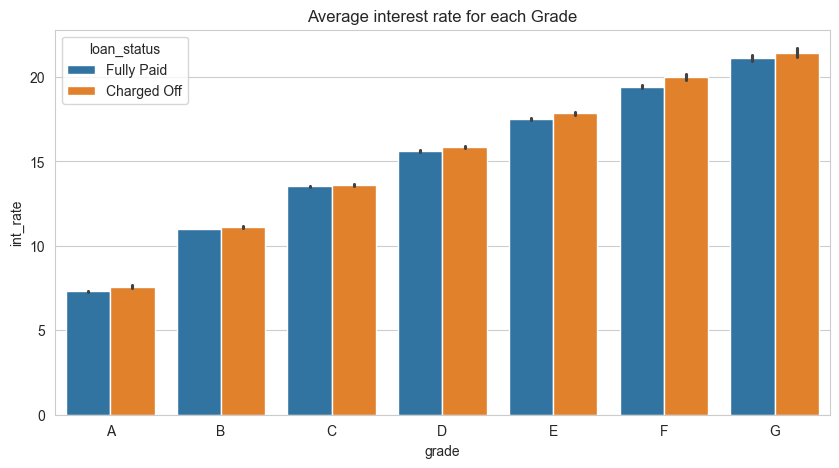

In [447]:
custom_palette = {
    'Fully Paid': '#1f77b4',  # Blue
    'Charged Off': '#ff7f0e'  # Orange
}
plt.figure(figsize=(10,5))
ax = sns.barplot(data =df, x='grade', y='int_rate', hue ='loan_status', palette=custom_palette ,order = sorted(df['grade'].unique()))

plt.title('Average interest rate for each Grade')
plt.show()

##### Conclusion: Interest Increases as the Grade Decreases

##### Interest rate VS term by loan status

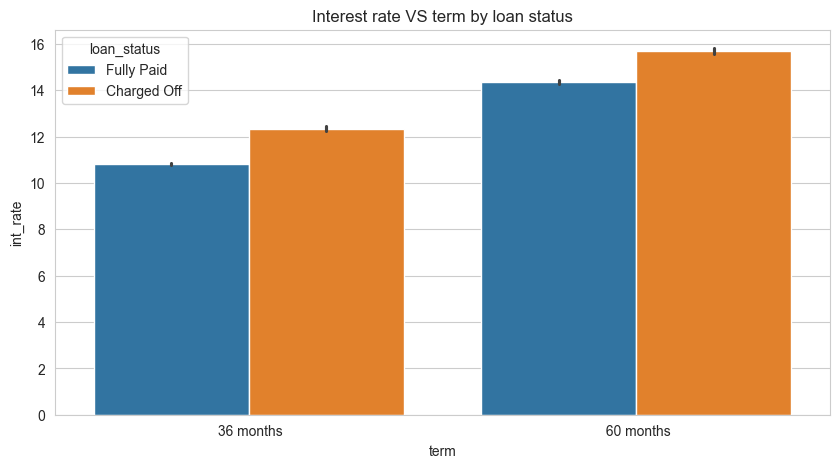

In [448]:
custom_palette = {
    'Fully Paid': '#1f77b4',  # Blue
    'Charged Off': '#ff7f0e'  # Orange
}
plt.figure(figsize=(10,5))
ax = sns.barplot(data =df, x='term', y='int_rate', hue ='loan_status', 
                 palette=custom_palette ,order = sorted(df['term'].unique()))

plt.title('Interest rate VS term by loan status')
plt.show()

##### Observation: Loan provided with an average of 12.5% interest rate for 36months of tenure is more likely to Default
##### Loan provided with an average of 16.5% interest rate for 60months of tenure are likely to default

##### Loan Amount VS term by loan status

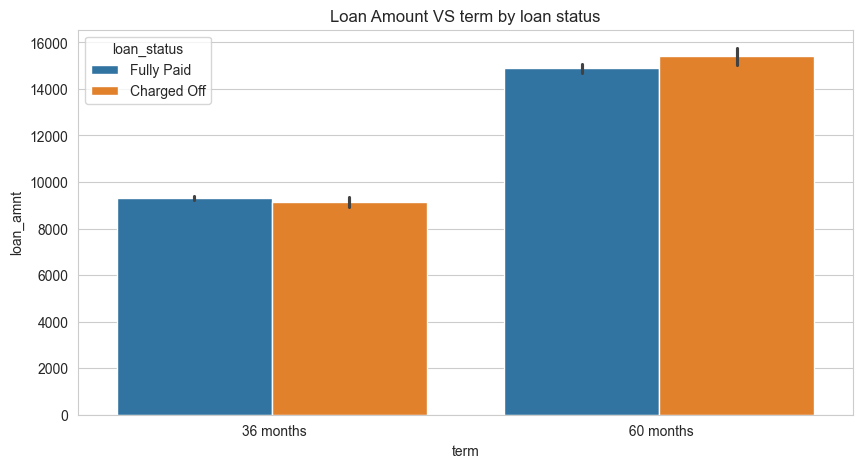

In [449]:
custom_palette = {
    'Fully Paid': '#1f77b4',  # Blue
    'Charged Off': '#ff7f0e'  # Orange
}
plt.figure(figsize=(10,5))
ax = sns.barplot(data =df, x='term', y='loan_amnt', hue ='loan_status', 
                 palette=custom_palette ,order = sorted(df['term'].unique()))

plt.title('Loan Amount VS term by loan status')
plt.show()

##### Observation: Customer with 60 month term has larger loan amount

##### Loan Amount VS int_rate by loan status

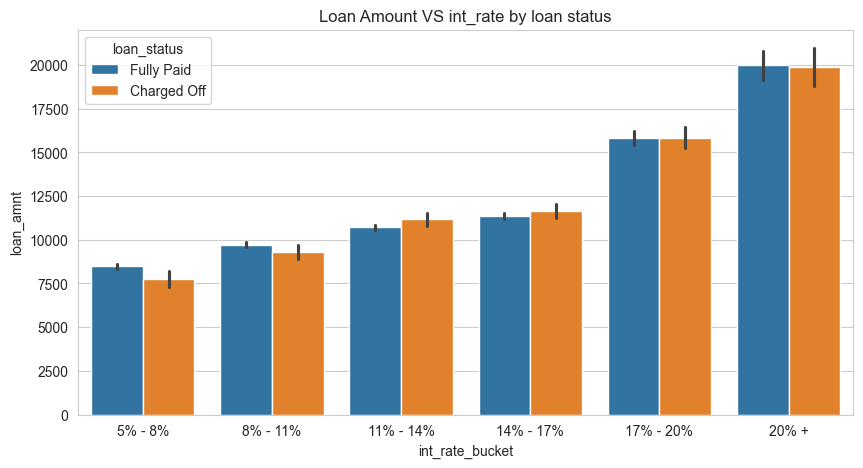

In [450]:
custom_palette = {
    'Fully Paid': '#1f77b4',  # Blue
    'Charged Off': '#ff7f0e'  # Orange
}
plt.figure(figsize=(10,5))
ax = sns.barplot(data =df, x='int_rate_bucket', y='loan_amnt', hue ='loan_status', 
                 palette=custom_palette )

plt.title('Loan Amount VS int_rate by loan status')
plt.show()

##### Observation: Interest Rate has a positive Corretation loan amount

##### Average age Interest Rate vs annual income bucket by Loan status

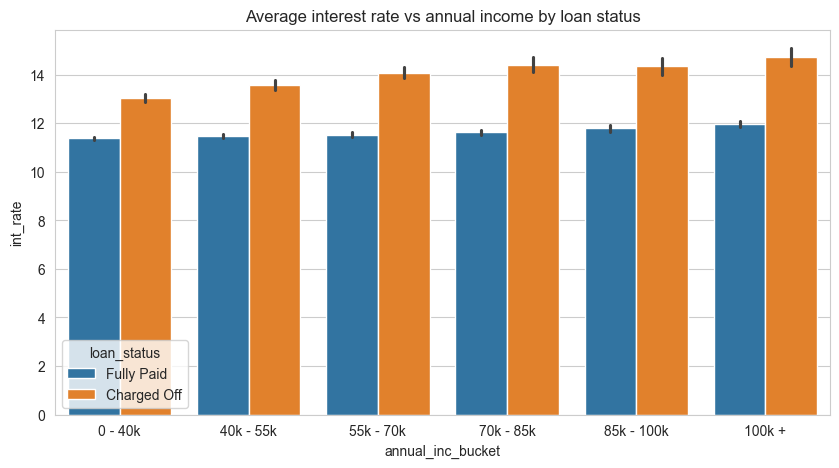

In [451]:
custom_palette = {
    'Fully Paid': '#1f77b4',  # Blue
    'Charged Off': '#ff7f0e'  # Orange
}
plt.figure(figsize=(10,5))
ax = sns.barplot(data =df, x='annual_inc_bucket', y='int_rate', hue ='loan_status', palette=custom_palette )

plt.title('Average interest rate vs annual income by loan status')
plt.show()

Observation: Average interest rate increases with increase in annual income. 

##### Loan Defaulter count for Grade vs DTI Bucket

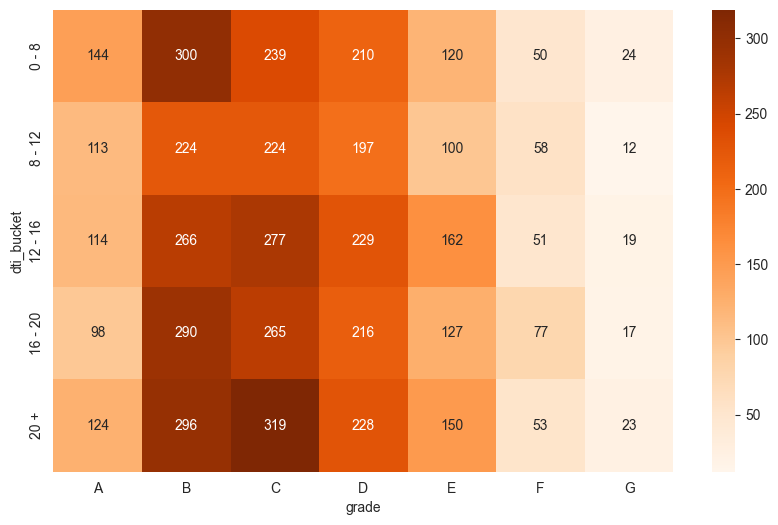

In [452]:
pivot = pd.pivot_table(data=df[df['loan_status']=='Charged Off'], 
                       index='dti_bucket', columns="grade", values='loan_status', 
                       aggfunc='size', fill_value=0)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='Oranges', annot=True, fmt=".0f")
plt.show()

##### Loan Defaulter count for Grade vs Revol_Util Bucket


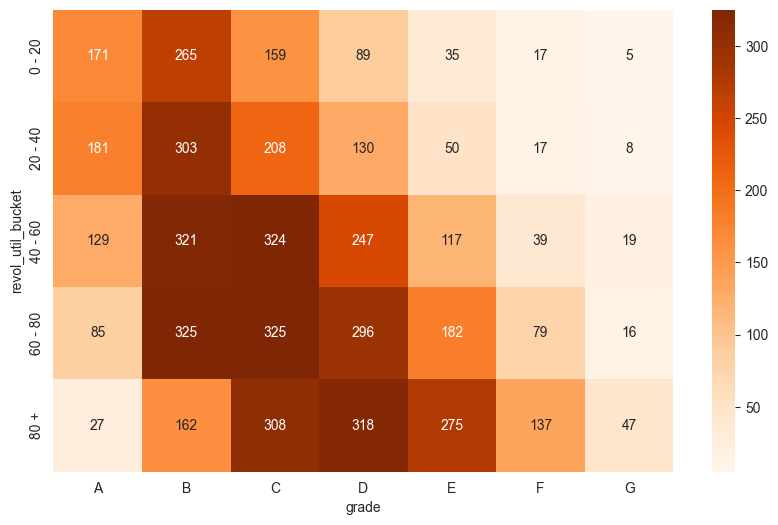

In [453]:
pivot = pd.pivot_table(data=df[df['loan_status']=='Charged Off'], 
                       index='revol_util_bucket', columns="grade", 
                       values='loan_status', aggfunc='size', fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='Oranges', annot=True, fmt=".0f")
plt.show()

##### Loan Defaulter count for Home Ownership vs loan_amount Bucket

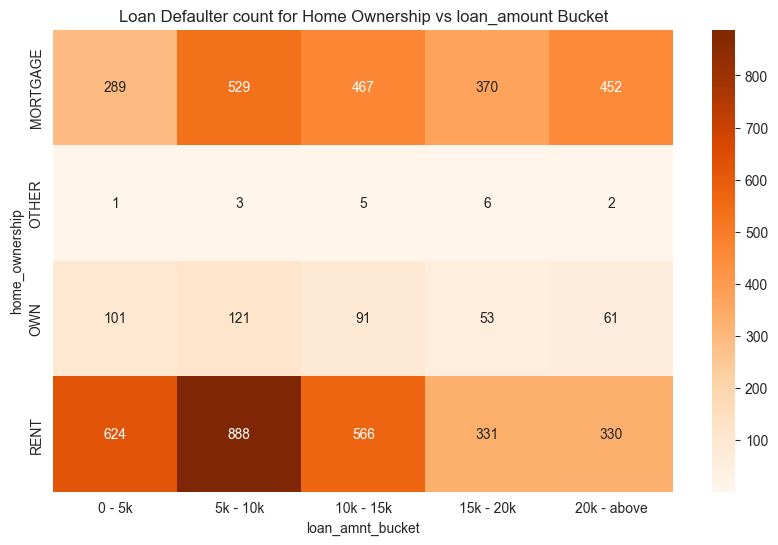

In [454]:

pivot = pd.pivot_table(data=df[df['loan_status']=='Charged Off'], 
                       index='home_ownership', columns="loan_amnt_bucket", 
                       values='loan_status', aggfunc='size', fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='Oranges', annot=True, fmt=".0f")
plt.title('Loan Defaulter count for Home Ownership vs loan_amount Bucket')
plt.show()

Observation: Customer living in Rent and loan amount less than 15K are highly like to default

##### Mean int_rate for Loan amount bucket vs home ownership

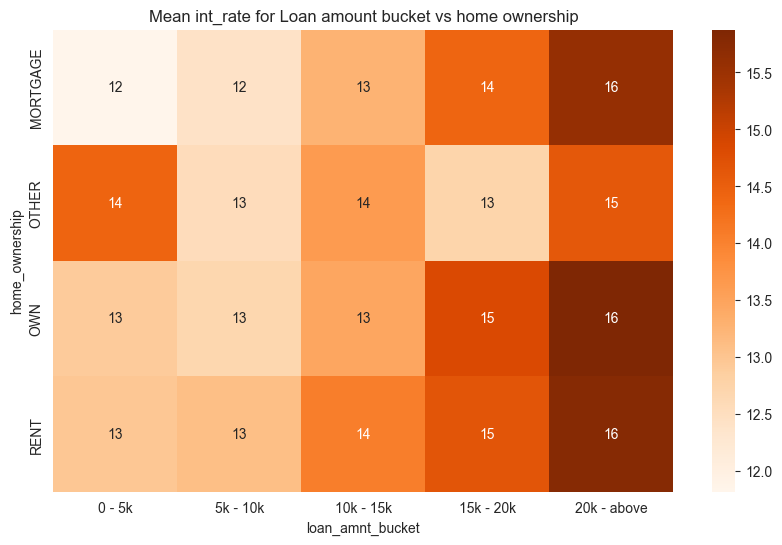

In [455]:
pivot = pd.pivot_table(data=df[df['loan_status']=='Charged Off'], 
                       index='home_ownership', columns="loan_amnt_bucket", 
                       values='int_rate', aggfunc='mean', fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='Oranges', annot=True, fmt=".0f")
plt.title('Mean int_rate for Loan amount bucket vs home ownership')
plt.show()

Observation: Interest Amount Increases for higher loan bucket. 

##### Loan Defaulter count for Home Ownership vs annual income Bucket


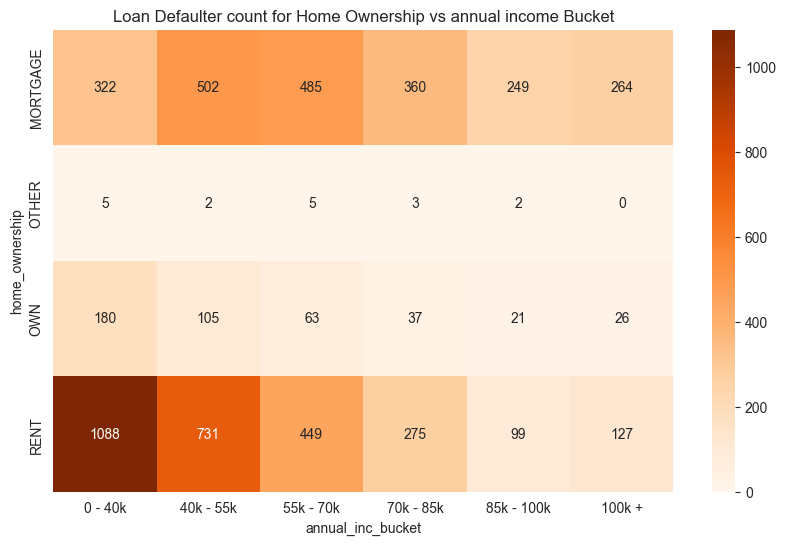

In [456]:
pivot = pd.pivot_table(data=df[df['loan_status']=='Charged Off'], 
                       index='home_ownership', columns="annual_inc_bucket", 
                       values='loan_status', aggfunc='size', fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='Oranges', annot=True, fmt=".0f")
plt.title('Loan Defaulter count for Home Ownership vs annual income Bucket')
plt.show()

Observation: Customer living in rent or having mortgage properties and having Annual income <80K is very likely to Default.

In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36642 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36642 non-null  int64         
 1   term                  36642 non-null  object        
 2   int_rate              36642 non-null  float64       
 3   installment           36642 non-null  float64       
 4   grade                 36642 non-null  object        
 5   sub_grade             36642 non-null  object        
 6   emp_length            36642 non-null  category      
 7   home_ownership        36642 non-null  object        
 8   annual_inc            36642 non-null  float64       
 9   verification_status   36642 non-null  object        
 10  issue_d               36642 non-null  datetime64[ns]
 11  loan_status           36642 non-null  object        
 12  purpose               36642 non-null  object        
 13  addr_state           

##### Distribution of loan amount vs Verification Status by loan status

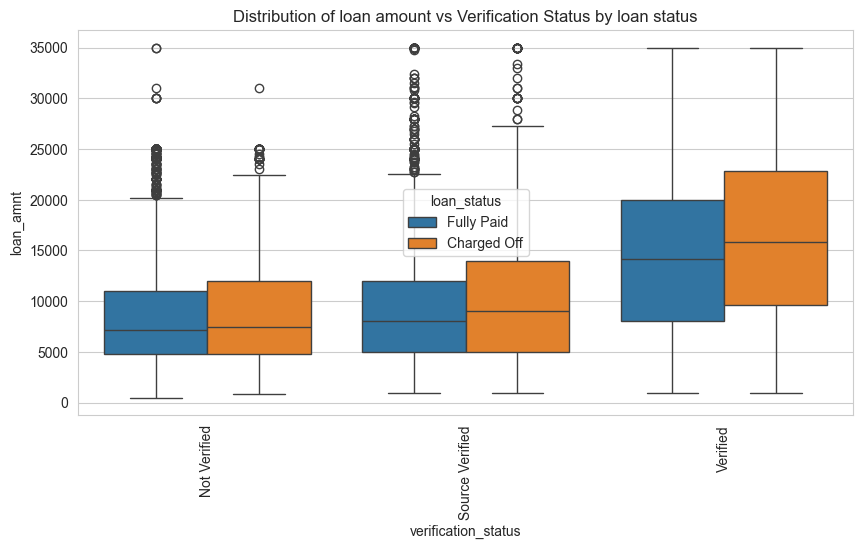

In [458]:
custom_palette = {
    'Fully Paid': '#1f77b4',  # Blue
    'Charged Off': '#ff7f0e'  # Orange
}
plt.figure(figsize=(10,5))
ax = sns.boxplot(data =df, x='verification_status', y='loan_amnt', hue ='loan_status', palette=custom_palette ,order = sorted(df['verification_status'].unique()))

plt.xticks(rotation=90, fontsize=10, ha='center')
plt.title('Distribution of loan amount vs Verification Status by loan status')
plt.show()

Observation: Unverified/Source Verified Customer can generally take loan up to 14k.

##### Loan Defaulter count for interest rate bucket vs dti Bucket

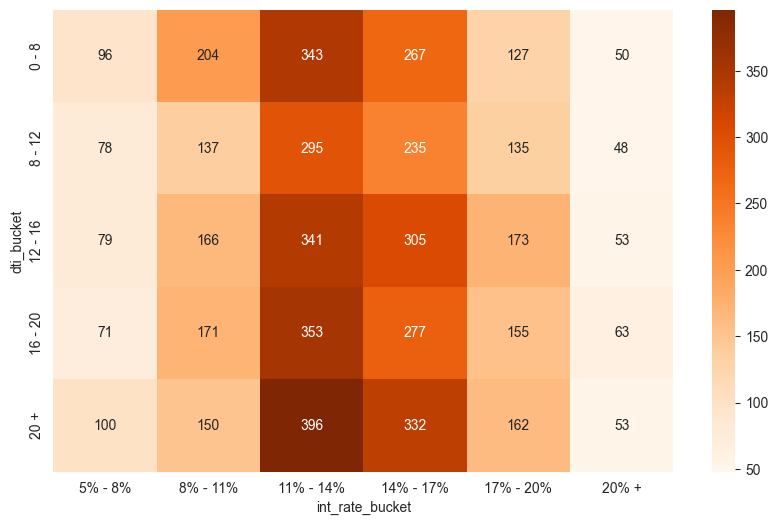

In [459]:
pivot = pd.pivot_table(data=df[df['loan_status']=='Charged Off'], 
                       index='dti_bucket', columns="int_rate_bucket", 
                       values='loan_status', aggfunc='size', fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='Oranges', annot=True, fmt=".0f")
plt.show()

##### dti vs purpose by loan status

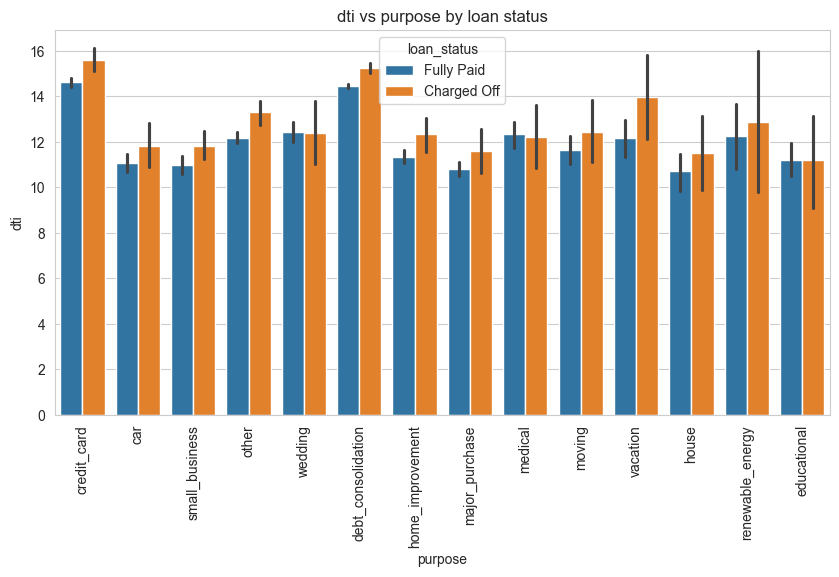

In [460]:
custom_palette = {
    'Fully Paid': '#1f77b4',  # Blue
    'Charged Off': '#ff7f0e'  # Orange
}
plt.figure(figsize=(10,5))
ax = sns.barplot(data =df, x='purpose', y='dti', hue ='loan_status', palette=custom_palette )

plt.xticks(rotation=90, fontsize=10, ha='center')
plt.title('dti vs purpose by loan status')
plt.show()

Observation : Customer opting loan for Credit card and debt consolidation has higher dti value, hence more porbable to default

##### Interest Rate vs purpose

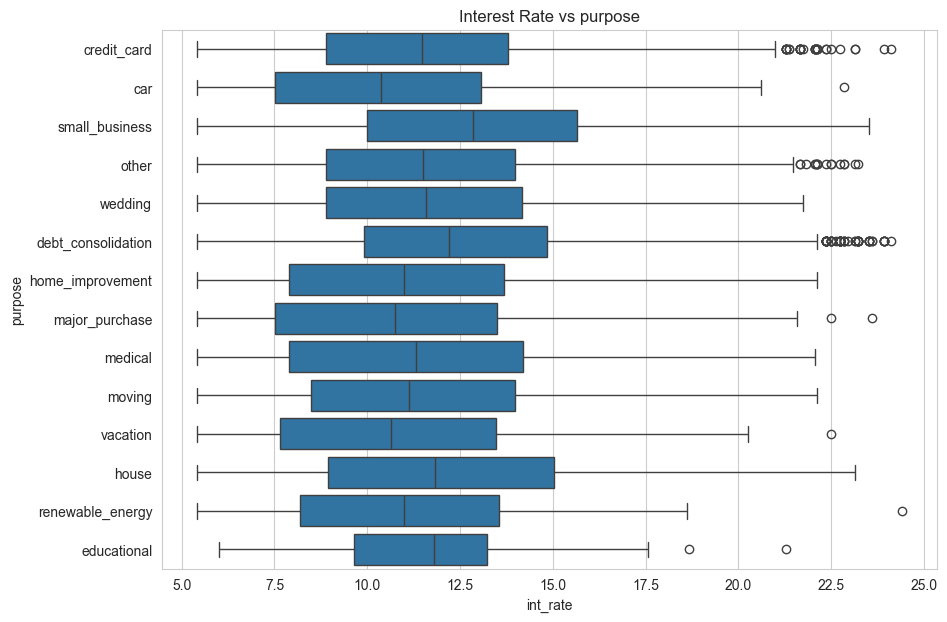

In [461]:
# Box plot for interest rate vs purpose
plt.figure(figsize=(10,7))
viz = sns.boxplot(x='int_rate', 
            y='purpose',
            data=df)

# Naming the axis and title
viz.set_xlabel('int_rate', fontsize = 10)
viz.set_ylabel('purpose', fontsize = 10)
viz.set_title('Interest Rate vs purpose')
plt.show()

Observation: Different loan purpose had different interest date distribution. The interest rate of small businesses being the maximum

##### Loan Defaulter count for Purpose vs annual income Bucket

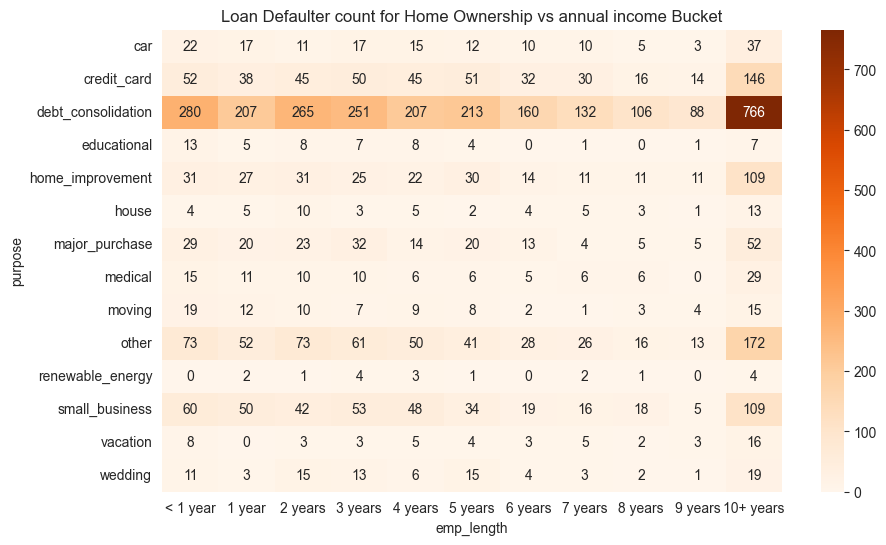

In [462]:
pivot = pd.pivot_table(data=df[df['loan_status']=='Charged Off'], 
                       index='purpose', columns="emp_length", 
                       values='loan_status', aggfunc='size', fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='Oranges', annot=True, fmt=".0f")
plt.title('Loan Defaulter count for Home Ownership vs annual income Bucket')
plt.show()

Observation : Customers with employment period more than 10 years are taking most of the loans for Debt consolidation and are also the highest contributer in small business  by a good margin

#### OBSERVATIONS

- Loan provided with an average of 12.5% interest rate for 36months of tenure is more likely to Default

- Loan provided with an average of 16.5% interest rate for 60months of tenure are likely to default

- Customer with 60 month term has larger loan amount

- Interest Rate has a positive Corretation loan amount

- Average interest rate increases with increase in annual income.

- Higher dti value customers have probublity of defaulting more even if customer has good Grades

- Customer living in Rent and loan amount less than 15K are highly like to default

- Interest Amount Increases for higher loan bucket.

- Customer living in rent or having mortgage properties and having Annual income <80K is very likely to Default.

- Customer opting loan for Credit card and debt consolidation has higher dti value, hence more porbable to default

- Different loan purpose had different interest date distribution. The interest rate of small businesses being the maximum

- Customers with employment period more than 10 years are taking most of the loans for Debt consolidation and are also the highest contributer in small business by a good margin


### 3.4 Multivariate Analysis

3.4.1 Correlation Analysis

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36642 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36642 non-null  int64         
 1   term                  36642 non-null  object        
 2   int_rate              36642 non-null  float64       
 3   installment           36642 non-null  float64       
 4   grade                 36642 non-null  object        
 5   sub_grade             36642 non-null  object        
 6   emp_length            36642 non-null  category      
 7   home_ownership        36642 non-null  object        
 8   annual_inc            36642 non-null  float64       
 9   verification_status   36642 non-null  object        
 10  issue_d               36642 non-null  datetime64[ns]
 11  loan_status           36642 non-null  object        
 12  purpose               36642 non-null  object        
 13  addr_state           

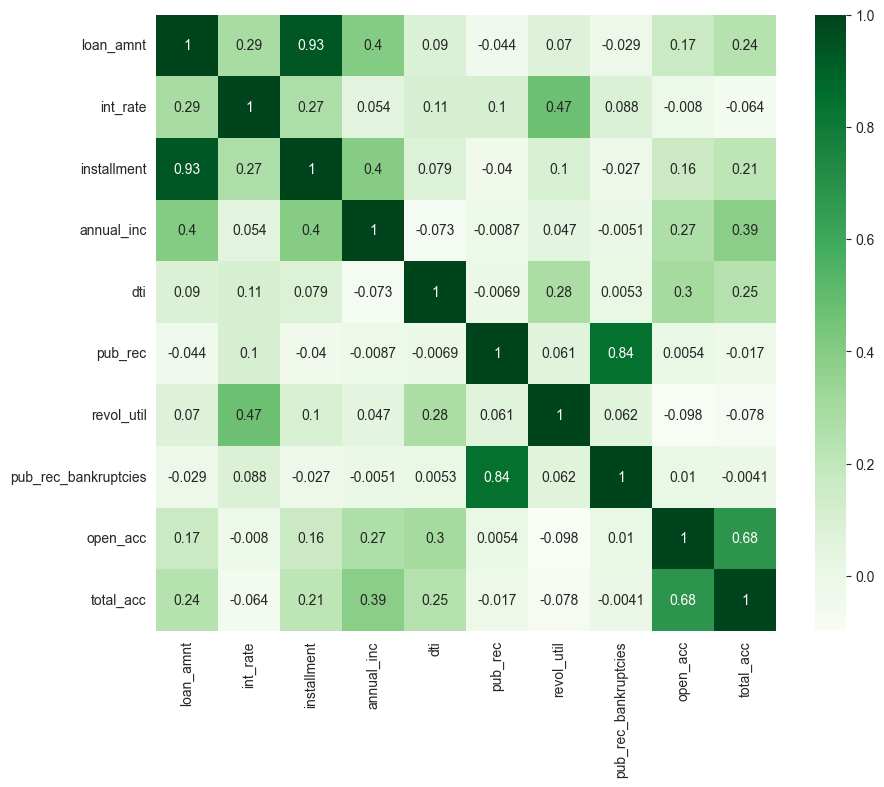

In [464]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['loan_amnt','int_rate','installment','annual_inc','dti','pub_rec',
                'revol_util','pub_rec_bankruptcies', 'open_acc', 'total_acc']].corr(), cmap='Greens', annot=True)
plt.show()

#### Ovservations:

Strong positive correlation:

- loan_amnt, installment
- pub_rec_bankruptcies, pub_rec
- open_acc, total_acc

Moderately positive Correlation:

- loan_amnt, lotal_acc, open_acc, annual_inc, int_rate
- int_rate, revol_util, installment, loan_amnt
- installment, open_acct, annual_inc
- annual_inc, total_acc, open_acc,
- dti, open,acc, total_acc, revol_util


### Recommendations

- Average interest rate increases with increase in annual income. We have also seen that sustomer with more annual income default less. So, if interest rate can be reduced by 1-2% for customer with higher annual income, then we may see lesser defaulter among higher income group. Also, more customer from higher income group will opt for Lending club.

- Should keep the loan amount of un verified customers within 12K.

- For customer living in rent, increase the interest amount by 2% for loans below 15k. Decrease the interest by 2% for loans above 15K.

- Given that applicants opting for 60-month loans are more likely to default, the company should consider evaluating the risk associated with longer-term loans and potentially limiting the maximum term or adjusting interest rates accordingly.

- Strict checking needs to be done in case of Customers with employment period more than 10 years and taking loan for Debt consolidation, small business. 

- Company should have a stricter verification procedure, especially for higer loan amounts (>12k).